# Bank Marketing dataset

The data is related with marketing campaigns of a Portuguese banking institution that were based on phone calls. The dataset contain several attributes such as bank clients data, information about current campaign and social and economic context attributes. The classification goal is to predict whether the client will subscribe a bank term deposit.  

In [306]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [307]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 41.188 observations and 21 variables in data including the target variable y.

### Variables description

#### Bank client data:
1. age

2. job : type of job

3. marital : marital status

4. education

5. default: has credit in default?

6. housing: has housing loan? 

7. loan: has personal loan? 

#### Related with the last contact of the current campaign:
8. contact: contact communication type

9. month: last contact month of year

10. day_of_week: last contact day of the week

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client

15. poutcome: outcome of the previous marketing campaign

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator

17. cons.price.idx: consumer price index - monthly indicator 

18. cons.conf.idx: consumer confidence index - monthly indicator 

19. euribor3m: euribor 3 month rate - daily indicator 
   - it is calculated by eliminating the highest 15% and the lowest 15% of the interest rates submitted and calculating the
     arithmetic mean of the remaining values

20. nr.employed: number of employees - quarterly indicator 

#### Target variable:
21. y - has the client subscribed a term deposit? 

In [308]:
# Descriptive statistics for numeric data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The contacted clients were 40 years old in average. The average duration of communication is approximately 258 seconds (4 minutes, 3 seconds). The maximum value is 4918 seconds that could be an outlier (almost 82 minutes long communication). As we saw in the description of varaibles, duration variable is highly correlated with the target, so in case of prediting outcomes, we should exclude it. Variable campaign holds the number of contacts performed during this campaign. 75% of clients were contacted 3 times or less, and maximum value of contacts with a client is 56 times. Seems like the employees of the bank have tried to contact the client several times until they get the response. Variable pdays describe the number of day that passed by after the last contact with the client regarding previous campaign. 75% clients were not contacted in the previous campaign (999 = no previous contact). The similar result is for variable previous, that the majority of clients was not contacted. 

Variable emp.var.rate is indicator of employment rate calculated every quarter. The employment rate measures the number of employed people by the total labor force and can be calculated for cities, counties, states and countries. The average employment rate is 0.08%.

Variable cons.price.idx means consumer price index (aka CPI) which is economic indicator. It is used to measure the average changes in prices over period of time, that households pay for a basket of goods and services. Most CPI index series use 1982-1984 as the basis for comparison. [The U.S. Bureau of Labor Statistics (BLS)](https://www.bls.gov/) set the index level during this period at 100. In our dataset, the maximum CPI is approximately 94%, which means that there has been 6% decrease in the price of the market basket compared to the period of years 1982-1984.

Variable cons.conf.idx means consumer confidence index (aka CCI) which is a survey performed by monthly base. [This survey](https://tradingeconomics.com/portugal/consumer-confidence) is based on interviews with consumers about their perceptions of the current and future economic situation in the country and their tendencies to purchase. The relative value is separately computed for each question in this survey (for each question, positive responses are divided by the sum of positive and negative responses). These relative values are then compared against relative values from benchmark year 1985 ([CCI](https://en.wikipedia.org/wiki/Consumer_confidence_index)). The lowest CCI is of value -50%.


In [309]:
# Descriptive statistics for categorical variables
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


From the above statistics we can see that the majority of clients work in the administrative field and have university degree. Also the most of clients are married and have borrowed money for financing their houses. The most common day of the week and month when the contact with a client was performed is Thursday and May, respectively. The majority of contacted clients have not subscribed a term deposit. There are only 10 months.

# 1. Data preprocessing

In [310]:
# Renaming columns
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [311]:
# Checking for missing values
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
default_credit               0
house_loan                   0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
contact_duration             0
number_of_contacts           0
days_passed                  0
number_previous_contact      0
previous_campaign_outcome    0
emp_variation_rate           0
cpi                          0
cci                          0
euribor_rate                 0
no_employees                 0
target                       0
dtype: int64

There are no missing values stored as NaN in the dataset. However, there still could be hidden missing values that we are not able to see right now. 

In [312]:
# Finding duplicate rows
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Here we can see all duplicate rows except their first occurence. These rows will be removed from the dataset.

In [313]:
# Removing duplicate rows
data.drop_duplicates(inplace = True)

In [314]:
# Checking whether the duplicate rows were correctly removed
data.duplicated().sum()

0

In [315]:
# Exploring data types
data.dtypes

age                            int64
job                           object
marital_status                object
education                     object
default_credit                object
house_loan                    object
loan                          object
contact_type                  object
month                         object
day_of_week                   object
contact_duration               int64
number_of_contacts             int64
days_passed                    int64
number_previous_contact        int64
previous_campaign_outcome     object
emp_variation_rate           float64
cpi                          float64
cci                          float64
euribor_rate                 float64
no_employees                 float64
target                        object
dtype: object

In [316]:
# Converting datatype of categorical variables to 'category' datatype
to_category = ['job','marital_status','education','default_credit','house_loan', 'loan','contact_type', 
               'month','day_of_week', 'previous_campaign_outcome']

In [317]:
for col in to_category:
  data[col] = data[col].astype('category')

In [318]:
data.dtypes

age                             int64
job                          category
marital_status               category
education                    category
default_credit               category
house_loan                   category
loan                         category
contact_type                 category
month                        category
day_of_week                  category
contact_duration                int64
number_of_contacts              int64
days_passed                     int64
number_previous_contact         int64
previous_campaign_outcome    category
emp_variation_rate            float64
cpi                           float64
cci                           float64
euribor_rate                  float64
no_employees                  float64
target                         object
dtype: object

In [319]:
# Month variable - abbreviations of months
data.month.unique()

['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['may', 'jun', 'jul', 'aug', ..., 'dec', 'mar', 'apr', 'sep']

In [320]:
# New months labels
mapping_values = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}

In [321]:
# Mapping new months labels
data.month = data.month.map(mapping_values)

In [322]:
data.month

0             May
1             May
2             May
3             May
4             May
           ...   
41183    November
41184    November
41185    November
41186    November
41187    November
Name: month, Length: 41176, dtype: category
Categories (10, object): ['April', 'August', 'December', 'Jul', ..., 'May', 'November', 'October', 'September']

In [323]:
data.day_of_week.unique()

['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['mon', 'tue', 'wed', 'thu', 'fri']

In [324]:
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

In [325]:
data.day_of_week = data.day_of_week.map(mapping_days)

# 2. Visualizations

## 2.1 Descriptive Analysis

### 2.1.1 Numerical variables

In [326]:
# Copy of dataset for visualizations
data_viz = data.copy()

In [327]:
# Encoding target variable to 1 if the term deposit has been subscribed, 0 otherwise
data_viz.target = data_viz.target.apply(lambda x: 1 if x == 'yes' else 0)

In [328]:
# Setting plotting parameters
parameters = {'figure.figsize':(13, 8),
             'axes.labelsize': 11,
             'axes.titlesize':16}
plt.rcParams.update(parameters)
sns.set_style('darkgrid')

### Age variable

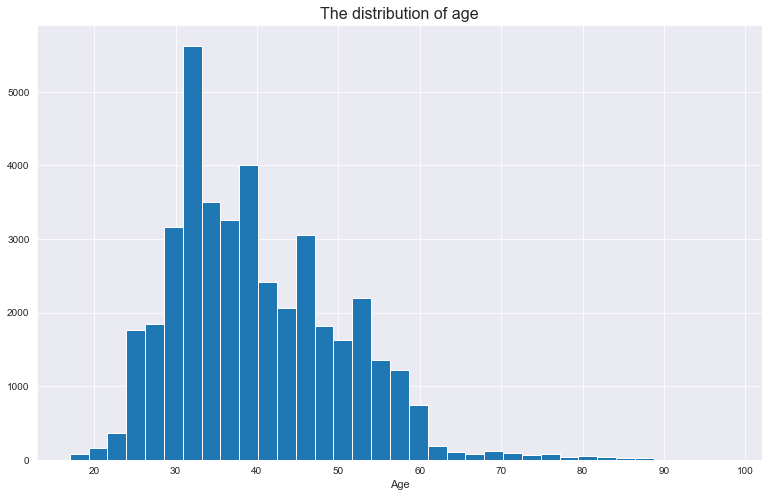

In [329]:
# The distribution of clients age
plt.hist(data_viz.age, bins = 35)
plt.title('The distribution of age')
plt.xlabel('Age');

The histogram above describes the distribution of clients' ages. The distribution is somewhat normal and rather unimodal with several peaks a little below 30, then at 40 and one peak between 40 and 50. The majority of the data points are between 30 and 40. Next, there is a very long tail after 60 years.

In [330]:
# Minimum and maximum age
print('The minimum age: {}'.format(data_viz.age.min()))
print('The maximum age: {}'.format(data_viz.age.max()))

The minimum age: 17
The maximum age: 98


In [331]:
data_viz[data_viz['age'] == 17]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
37140,17,student,single,unknown,no,yes,no,cellular,August,Wednesday,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0
37539,17,student,single,basic.9y,no,yes,no,cellular,August,Friday,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
37558,17,student,single,basic.9y,no,yes,no,cellular,August,Friday,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,August,Friday,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
38274,17,student,single,unknown,no,no,yes,cellular,October,Tuesday,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1


In [332]:
data_viz[data_viz['age'] == 98]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,October,Friday,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,1
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,October,Friday,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,1


There are two 17 years old client who have subscribed the term deposit. The oldest client are 98 years old, who also have subscribed the term deposit. At this point I would like to look closer at the higher ages of clients as these can be possible outliers.

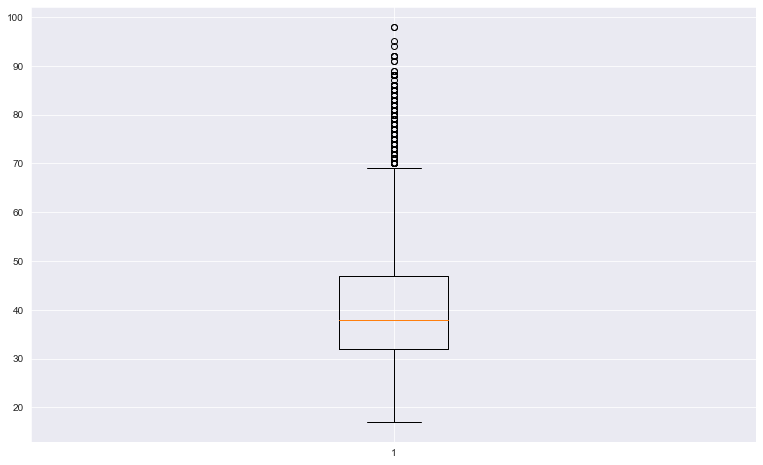

In [333]:
# Visualizing age of clients using boxplot 
plt.boxplot(data_viz.age);

The simplest way how to display possible outliers is using boxplot that shows us how the datapoint are spread out. The positive skewed distribution of datapoints reveal that every datapoint higher then 70 is outlier. One way how we can handle these outliers in age variable is using discretisation, also called binning, when continuous variable is transformed into discrete one. We´ll try to discretize age variable in Feature engineering section of this notebook.

In [334]:
age_bins = pd.qcut(data_viz['age'], 6)

In [335]:
print("Bin intervals:\n", age_bins.values, "\n"*3, "Amount of observation per bin", "\n", age_bins.value_counts())

Bin intervals:
 [(51.0, 98.0], (51.0, 98.0], (34.0, 38.0], (38.0, 44.0], (51.0, 98.0], ..., (51.0, 98.0], (44.0, 51.0], (51.0, 98.0], (38.0, 44.0], (51.0, 98.0]]
Length: 41176
Categories (6, interval[float64]): [(16.999, 30.0] < (30.0, 34.0] < (34.0, 38.0] < (38.0, 44.0] < (44.0, 51.0] < (51.0, 98.0]] 


 Amount of observation per bin 
 (16.999, 30.0]    7381
(30.0, 34.0]      7370
(38.0, 44.0]      7076
(44.0, 51.0]      6506
(51.0, 98.0]      6424
(34.0, 38.0]      6419
Name: age, dtype: int64


### contact_duration variable

For better interpretation I will convert seconds to minutes in variable contact_duration and look at the distribution of the time.

In [336]:
# Converting seconds to minutes 
data_viz.contact_duration = data_viz.contact_duration.apply(lambda x: x / 60)

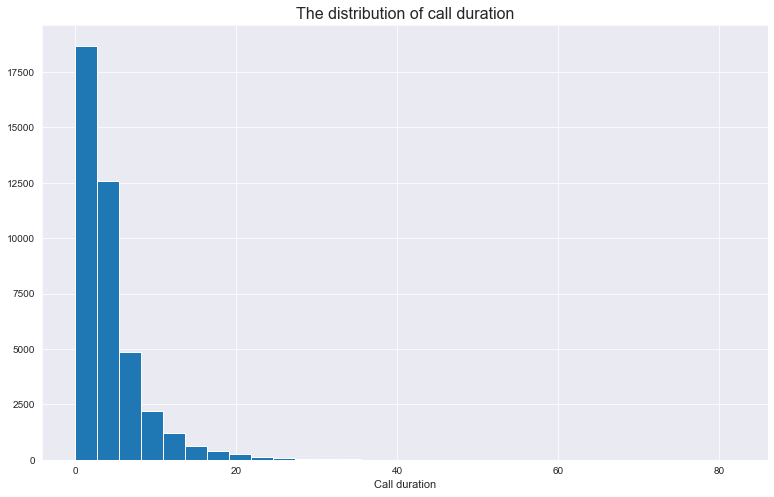

In [337]:
# The call duration distribution
plt.hist(data_viz.contact_duration, bins=30)
plt.title('The distribution of call duration')
plt.xlabel('Call duration');

As we can saw in the summary od descriptive statistics, the longest call with the client was 82 minutes long. The histogram shows us that the most of the calls are under 10 minutes. Now I would like to find out whether there are call with no duration.

In [338]:
# Observations where is no duration recorded 
data_viz[data_viz['contact_duration'] == 0]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
6251,39,admin.,married,high.school,no,yes,no,telephone,May,Tuesday,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23031,59,management,married,university.degree,no,yes,no,cellular,August,Tuesday,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,April,Friday,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,May,Monday,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


These four clients have not been contacted during the campaign. These observations will be removed because they do not provide useful information for us.

In [339]:
# Get the index of rows that should be dropped
index_rows_to_drop = data_viz[data_viz['contact_duration'] == 0].index

In [340]:
# Drop those rows from the dataframe
data_viz.drop(index_rows_to_drop, inplace = True)

Now we´ll look closer at the particular range of call duration by limiting x-axis.

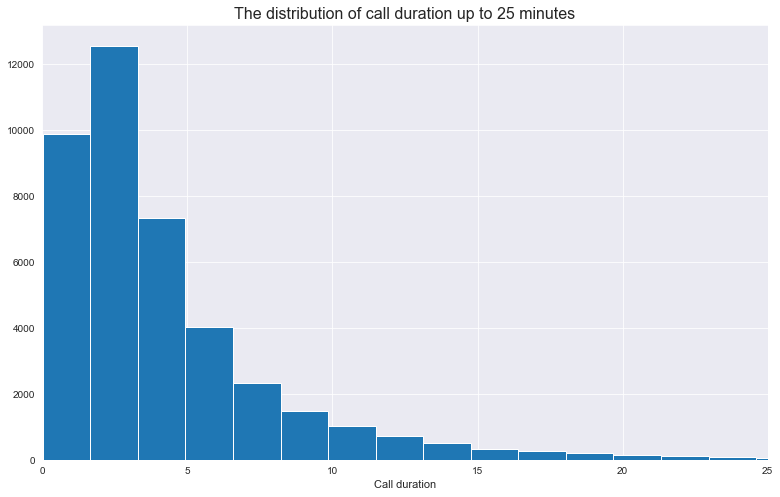

In [341]:
# Setting the axis limit
plt.hist(data_viz.contact_duration, bins = 50)
plt.title('The distribution of call duration up to 25 minutes')
plt.xlabel('Call duration');
plt.xlim(0, 25);

The majority of calls were approximately 3 minutes long.

### number_of_contacts variable

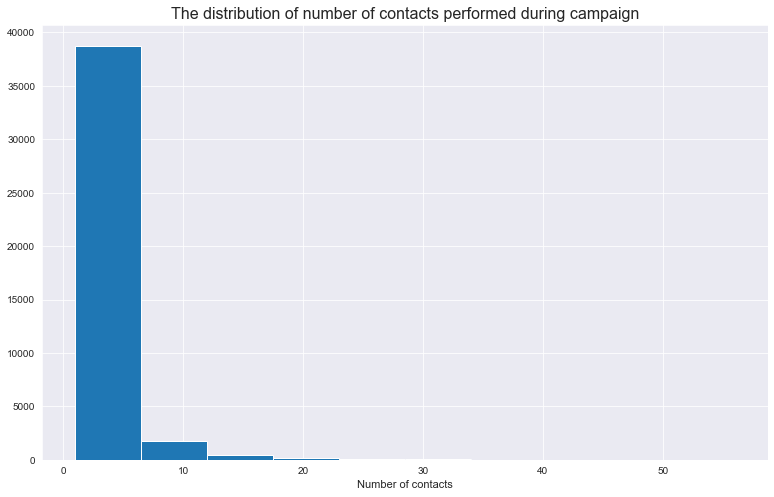

In [342]:
# Number of performed contacts distribution
data.number_of_contacts.hist()
plt.title('The distribution of number of contacts performed during campaign')
plt.xlabel('Number of contacts');

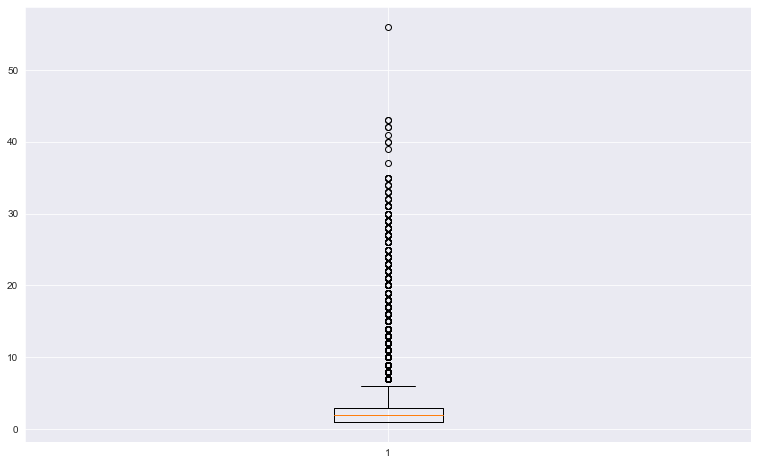

In [343]:
# The number of contacts
plt.boxplot(data_viz.number_of_contacts);

Some of the clients were contacted more than once in order to get their final answer (whether they want to subscribe the term deposit or not). Most of the clients were contacted approximately 3 times. For some clients there are large numbers of performed contacts (10-40). Even the enormous number of 56 calls.  

### days_passed variable

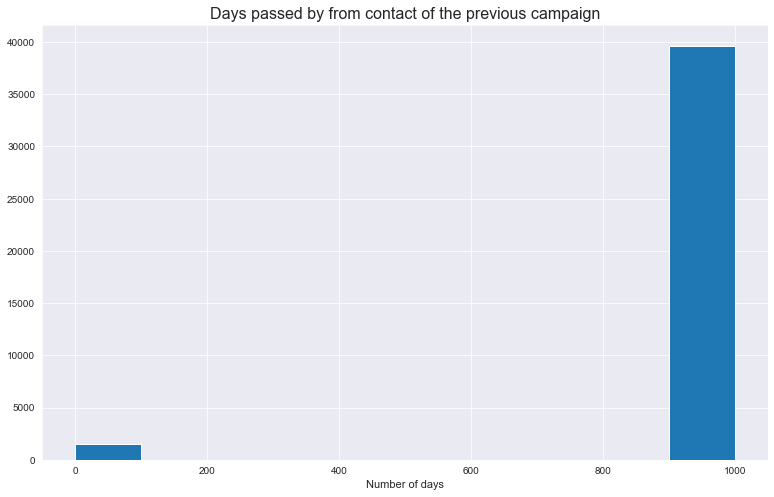

In [344]:
# days_passed distribution
data_viz.days_passed.hist()
plt.title('Days passed by from contact of the previous campaign')
plt.xlabel('Number of days');

This variable contain information about the number of days that passed by after the client was last contacted from a previous campaign. Here we can see that almost all of the data points have value 999 what means that client was not previously contacted.


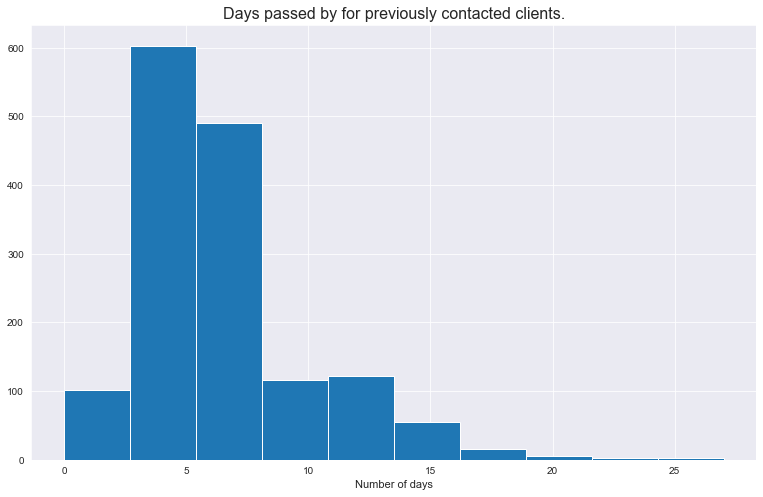

In [345]:
# Visualization of days_passed variable except those clients who were not previously contacted
days_passed = data_viz.query('days_passed != 999')
days_passed.days_passed.hist()
plt.title('Days passed by for previously contacted clients.')
plt.xlabel('Number of days');

After excluding clients who have not been contacted, the number of days passed after the previous campaign is approximately 3 to 8 days for most clients. 

### 2.1.2 Categorical variables

In [346]:
# Function to create a countplot
def create_countplot(x,order, **kwargs):
    title = kwargs.pop('title')
    xlabel = kwargs.pop('xlabel')
    ylabel = kwargs.pop('ylabel')
    plt.figure()
    sns.countplot(x, order = x.value_counts(ascending = False).index, **kwargs)
    plt.xticks(rotation = 45)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title(title)
        axis.xaxis.set_label_text(xlabel)
        axis.yaxis.set_label_text(ylabel)
    return axis

In [347]:
# Categorical variables in the dataset
list(data_viz.select_dtypes(include = 'category'))

['job',
 'marital_status',
 'education',
 'default_credit',
 'house_loan',
 'loan',
 'contact_type',
 'month',
 'day_of_week',
 'previous_campaign_outcome']

### job variable

In [348]:
# Unique values of job variable
data_viz.job.value_counts()

admin.           10418
blue-collar       9251
technician        6739
services          3967
management        2923
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

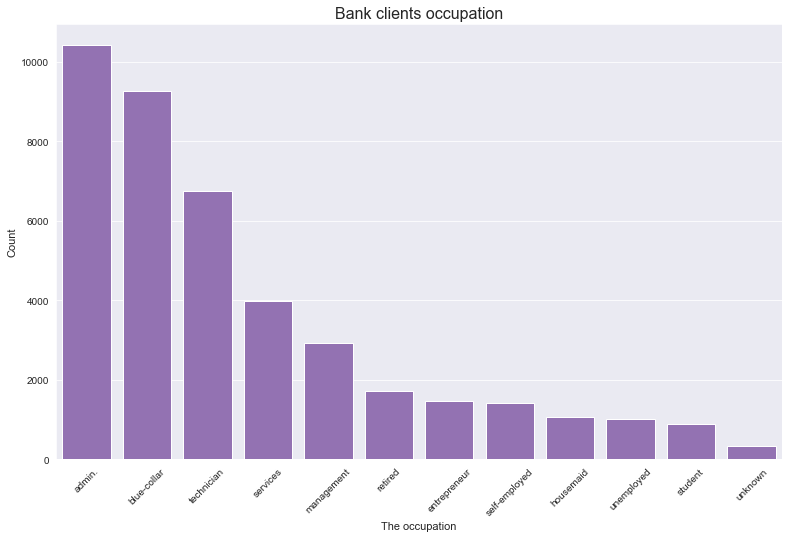

In [349]:
# Clients jobs visualization
base_color = sns.color_palette()[4]
labels = {'title':'Bank clients occupation','xlabel':'The occupation','ylabel':'Count'}
create_countplot(data_viz.job, order = data.job, color = base_color, **labels);

The majority of bank clients work in the administrative field and are 'blue-collar' workers who perform manual labor. The third common occupation is a technician. Similar counts have clients who are entrepreneurs and self-employed people. We do not have information on occupation type for 330 bank clients.

### marital_status variable

In [350]:
# Unique values of marital status
data_viz.marital_status.value_counts()

married     24918
single      11564
divorced     4610
unknown        80
Name: marital_status, dtype: int64

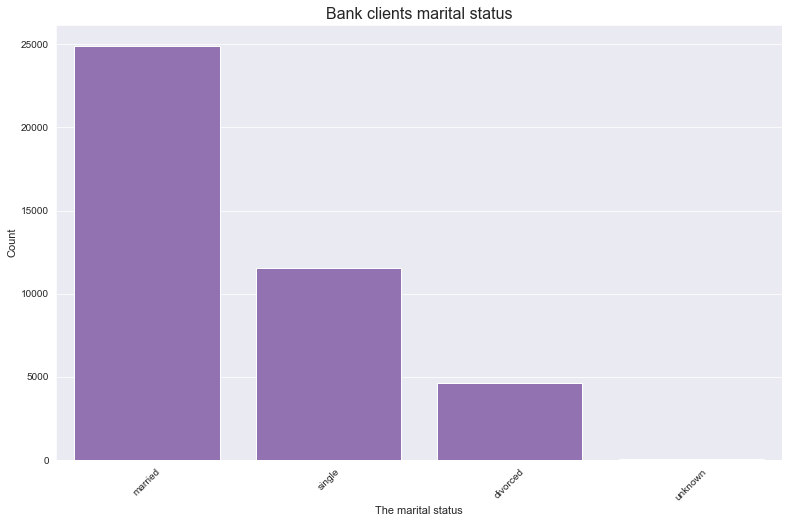

In [351]:
# Clients marital status visualization
labels = {'title':'Bank clients marital status','xlabel':'The marital status','ylabel':'Count'}
create_countplot(data_viz.marital_status, order = data_viz.marital_status, color = base_color, **labels);

There are 4 categories in the marital_status variable: unknown, married, single, and divorced (where divorced category means divorced or widowed). Most of the clients are married, and we do not know the marital status of 80 clients.

### education variable

In [352]:
# Unique values of education of bank clients
data_viz.education.value_counts()

university.degree      12163
high.school             9510
basic.9y                6044
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

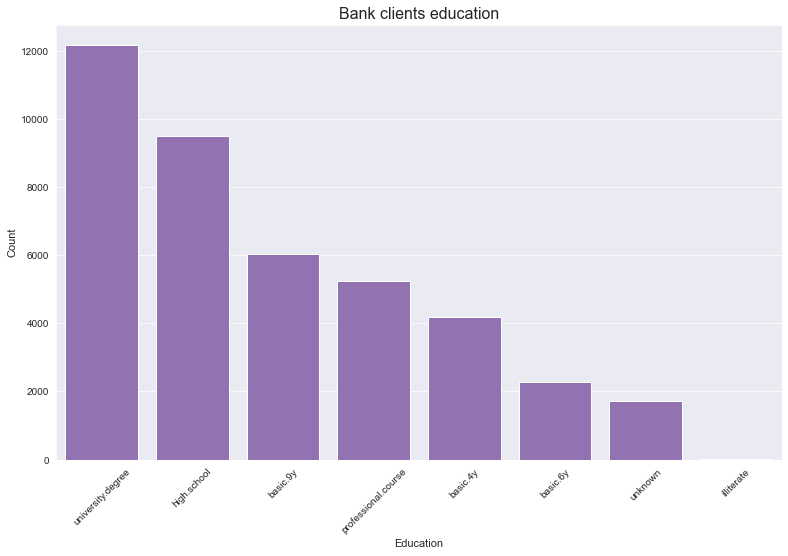

In [353]:
# Clients education visualization
labels = {'title':'Bank clients education','xlabel':'Education','ylabel':'Count'}
create_countplot(data_viz.education, order = data_viz.education, color = base_color, **labels);

The majority of clients have university degree followed by high school education. There are 3 categories of basic school education. More than 5000 clients have stated professional course as an education. Again we missed education records for 1730 clients. 

### default_credit variable

In [354]:
# Unique categories for default_credit variable
data_viz.default_credit.value_counts()

no         32573
unknown     8596
yes            3
Name: default_credit, dtype: int64

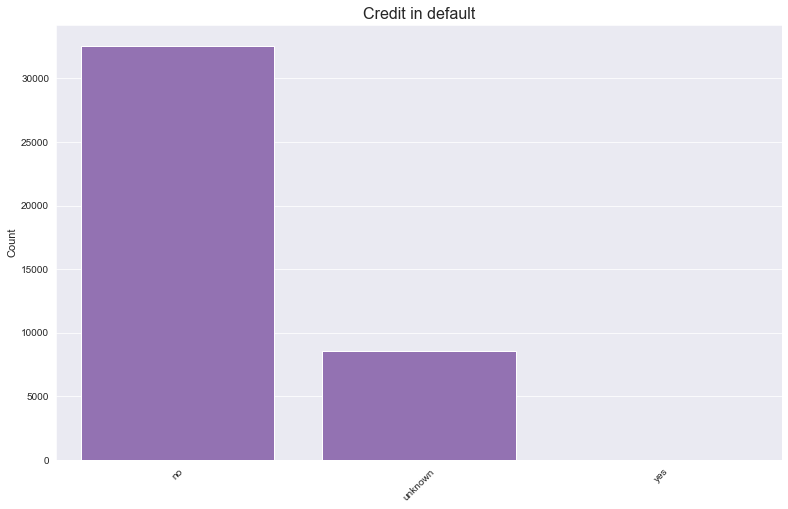

In [355]:
# Default credit visualization
labels = {'title':'Credit in default','xlabel':'','ylabel':'Count'}
create_countplot(data_viz.default_credit, order = data_viz.default_credit, color = base_color, **labels);

Only 3 clients have failed to repay the debt on the time. For 8596 clients we do not have information.

### house_loan variable 

In [356]:
# Unique values of house_loan variable
data_viz.house_loan.value_counts()

yes        21568
no         18614
unknown      990
Name: house_loan, dtype: int64

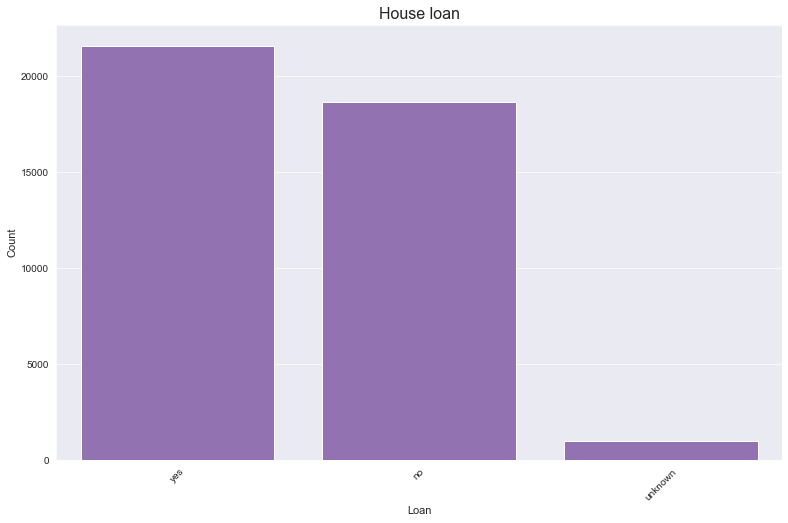

In [357]:
# House loan visualization
labels = {'title':'House loan','xlabel':'Loan','ylabel':'Count'}
create_countplot(data_viz.house_loan, order = data_viz.house_loan, color = base_color, **labels);

More than 20.000 contacted clients have a housing loan, and 990 clients did not share this information.

### loan variable

In [358]:
# Unique values of loan variable
data_viz.loan.value_counts()

no         33934
yes         6248
unknown      990
Name: loan, dtype: int64

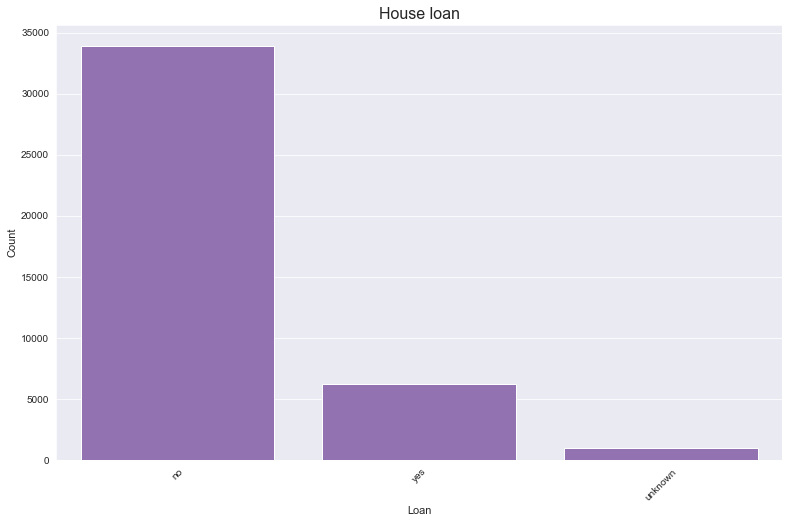

In [359]:
# Loan visualization
create_countplot(data_viz.loan, order = data_viz.loan, color = base_color, **labels);

The majority of clients do not have personal loans. This information is unknown for 990 clients.

### contact_type variable

In [360]:
# Unique values of contact_type variable
data_viz.contact_type.value_counts()

cellular     26132
telephone    15040
Name: contact_type, dtype: int64

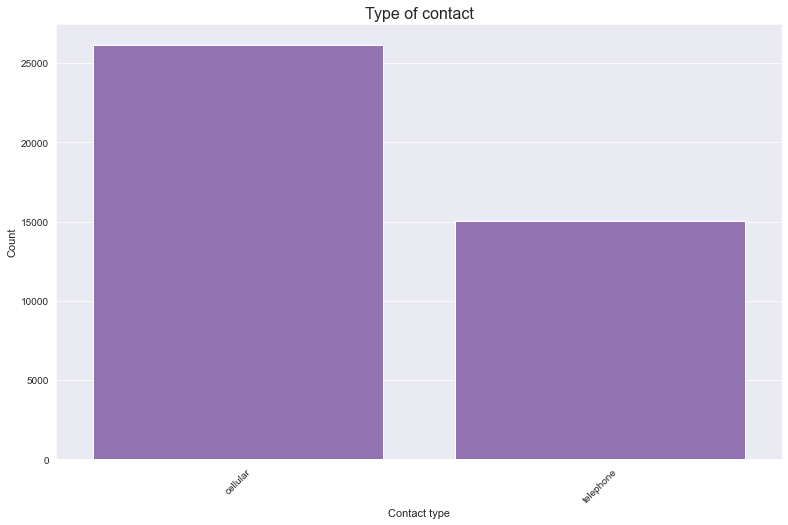

In [361]:
# Type of contact visualization
labels = {'title':'Type of contact','xlabel':'Contact type','ylabel':'Count'}
create_countplot(data_viz.contact_type, order = data_viz.contact_type, color = base_color, **labels);

There are two ways how the bank employees have contacted their clients: cellphone (cellular) or telephone.

### month variable

For visualization purposes we´ll set the order of months and days variables.

In [362]:
# Change the order of months and define a custom CategoricalDtype
cat_order = ['February','March','April','May','Jun','Jul','August','September','October','November','December']      

In [363]:
ordered_cat = pd.api.types.CategoricalDtype(categories = cat_order, ordered = True)

In [364]:
data_viz.month = data_viz.month.astype(ordered_cat)

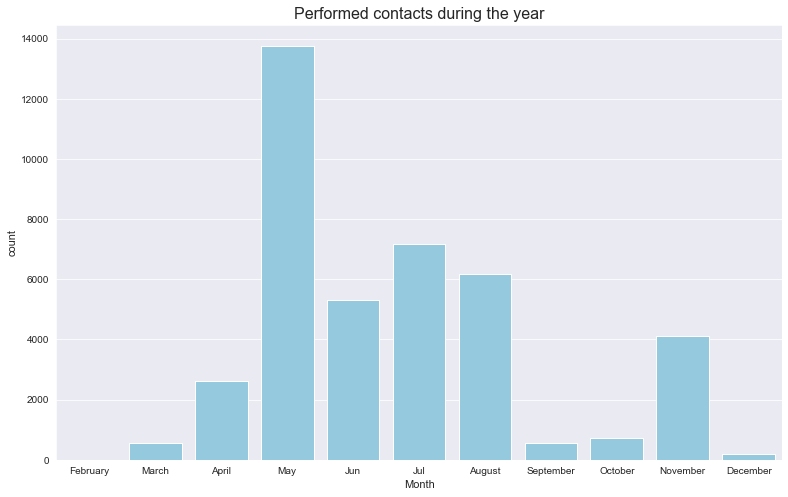

In [365]:
# Month variable visualization
sns.countplot(data = data_viz, x = 'month', color = 'skyblue')
plt.title('Performed contacts during the year')
plt.xlabel('Month');

Most clients have been contacted through the summer from May to August.

### day_of_week variable

In [366]:
# Change the order of days and define a custom CategoricalDtype
cat_day = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [367]:
ordered_cat_day = pd.api.types.CategoricalDtype(categories = cat_day, ordered = True)

In [368]:
data_viz.day_of_week = data_viz.day_of_week.astype(ordered_cat_day)

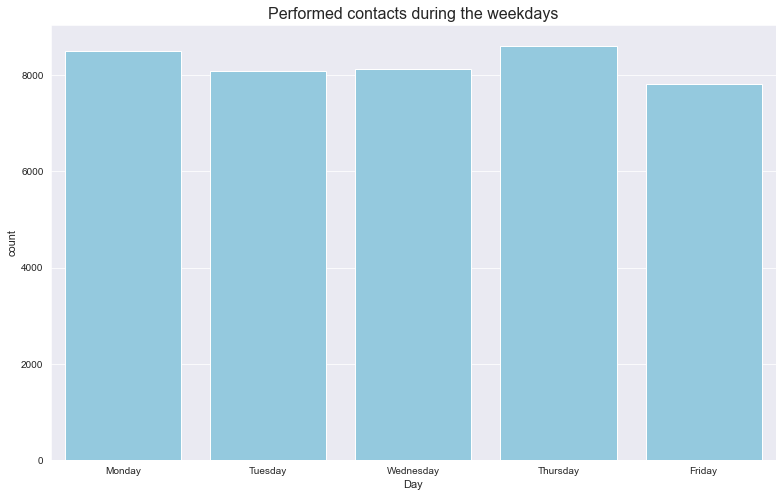

In [369]:
# day_of_week variable visualization
sns.countplot(data = data_viz, x = 'day_of_week', color = 'skyblue')
plt.title('Performed contacts during the weekdays')
plt.xlabel('Day');

For each day, there have been performed a similar amount of calls.

### previous_campaign_outcome variable

In [370]:
# Unique values of previous_campaign_outcome variable
data_viz.previous_campaign_outcome.value_counts()

nonexistent    35547
failure         4252
success         1373
Name: previous_campaign_outcome, dtype: int64

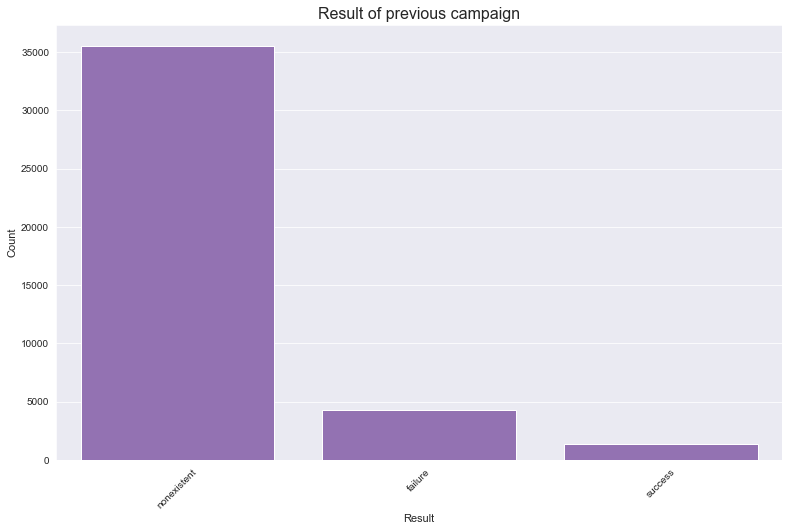

In [371]:
# Output of previous campaign visualization
labels = {'title':'Result of previous campaign','xlabel':'Result','ylabel':'Count'}
create_countplot(data_viz.previous_campaign_outcome, order = data_viz.previous_campaign_outcome, color = base_color, **labels);

For the major part of the records, we do not have information about previous campaign results.

### Target variable

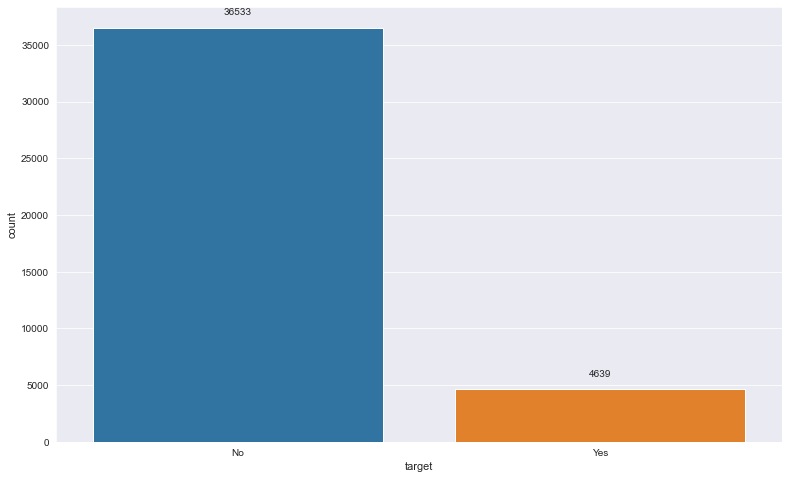

In [372]:
# Target variable visualization
ax = sns.countplot(data = data_viz, x = 'target')
ax.set_xticklabels(['No','Yes'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points');

From all of the contacted clients, only 4639 of them have subscribed to a term deposit.

## 3. EDA

In this part, we aim at finding possible relationships between independent variables and the target variable.

### Job and target

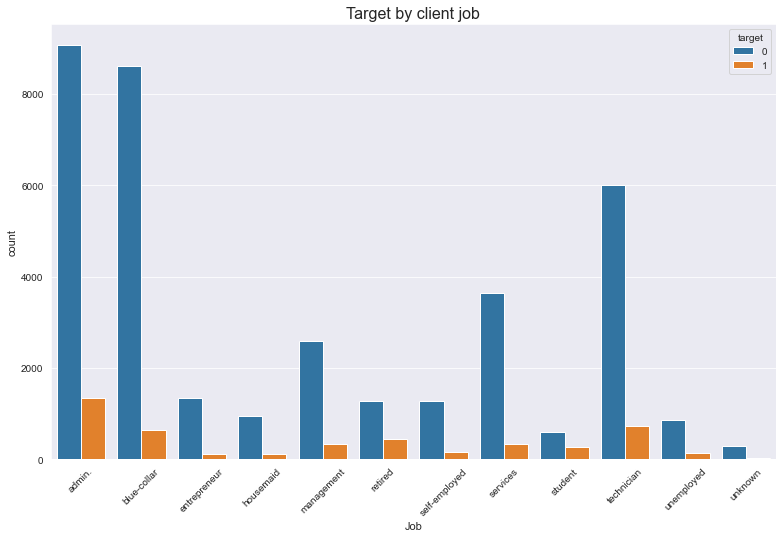

In [373]:
# Visualizing target variable by client job
sns.countplot(data = data_viz, x = 'job', hue = 'target')
plt.title('Target by client job')
plt.xlabel('Job')
plt.xticks(rotation = 45);

Comparing the target variable with the clients' job shows that clients working in the administrative field dominate regarding term deposit subscriptions. In the second place are blue-collar workers and technicians, followed by clients who are retired and clients on the management level.

In [374]:
# Function to create proportion of target feature
def compute_proportion(data, column):
    by_category = pd.DataFrame()
    by_category = round(data.groupby(column).target.mean()*100)
    by_category.append(by_category)
    return by_category

In [375]:
# Computing proportion of subscription by client job
by_job = compute_proportion(data_viz, 'job')
by_job

job
admin.           13.0
blue-collar       7.0
entrepreneur      9.0
housemaid        10.0
management       11.0
retired          25.0
self-employed    10.0
services          8.0
student          31.0
technician       11.0
unemployed       14.0
unknown          11.0
Name: target, dtype: float64

From all the jobs above, the students have the highest subscription rate of 31%. The smallest rate have blue-collar workers, followed by clients who work in services.

### Marital status and target

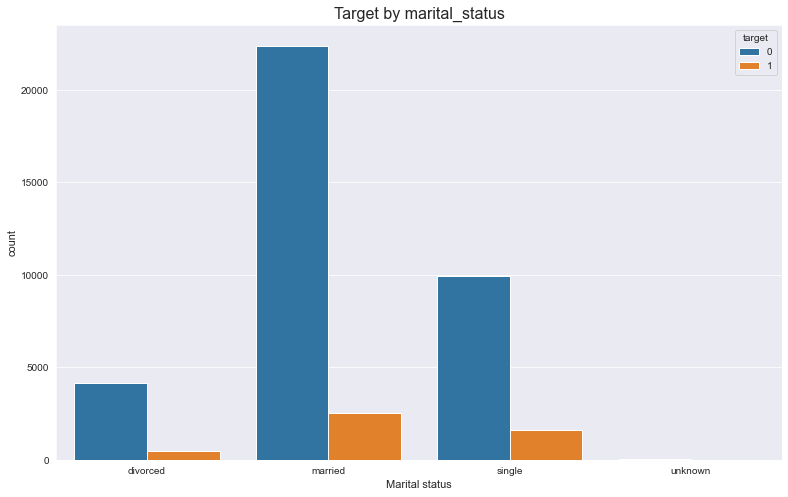

In [376]:
# Visualizing target variable by marital status of client
sns.countplot(data = data_viz, x = 'marital_status', hue = 'target')
plt.title('Target by marital_status')
plt.xlabel('Marital status');

It seems that for married people, there is a higher probability of taking the term deposit as well as for single people. People who are divorced tend to have a rather negative response to calls.

In [377]:
by_marital = compute_proportion(data_viz, 'marital_status')
by_marital

marital_status
divorced    10.0
married     10.0
single      14.0
unknown     15.0
Name: target, dtype: float64

The highest rate belongs to clients who we do not know their marital status for. In second place, there are clients who are single.

### Clients education and target

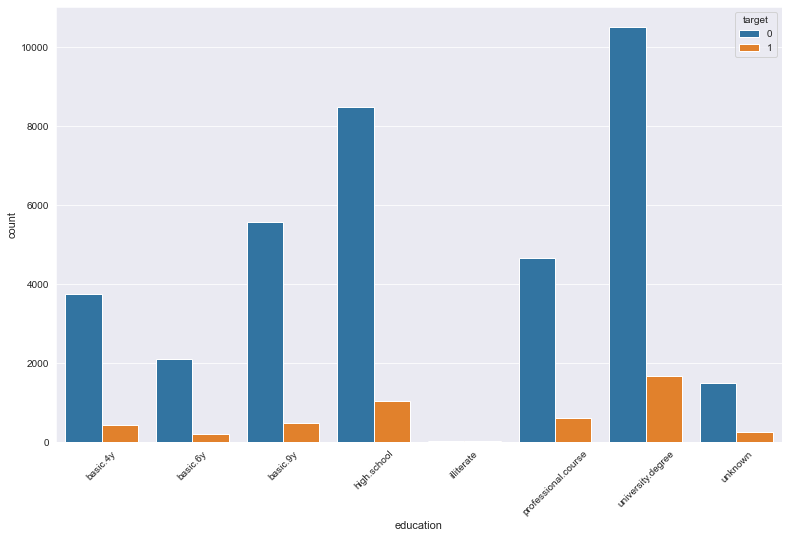

In [378]:
sns.countplot(data = data_viz, x = 'education', hue = 'target')
plt.xticks(rotation = 45);

In [379]:
by_ed = compute_proportion(data_viz, 'education')
by_ed

education
basic.4y               10.0
basic.6y                8.0
basic.9y                8.0
high.school            11.0
illiterate             22.0
professional.course    11.0
university.degree      14.0
unknown                15.0
Name: target, dtype: float64

Besides 18 client who have no education (illiterate) and the clients with unknown education, the highest subscription rate have people with university degree. The same rate of 11% have clients with high school education and with professional course.

### Deafult credit and target

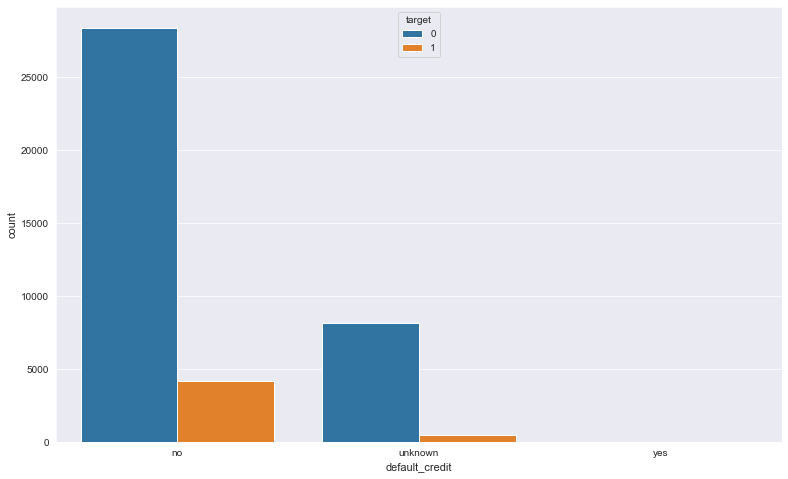

In [380]:
sns.countplot(data = data_viz, x = 'default_credit', hue = 'target');

In [381]:
by_default_credit = compute_proportion(data_viz, 'default_credit')
by_default_credit

default_credit
no         13.0
unknown     5.0
yes         0.0
Name: target, dtype: float64

The client who do not have credit in default have the highest subscription rate.

### Housing loan and target

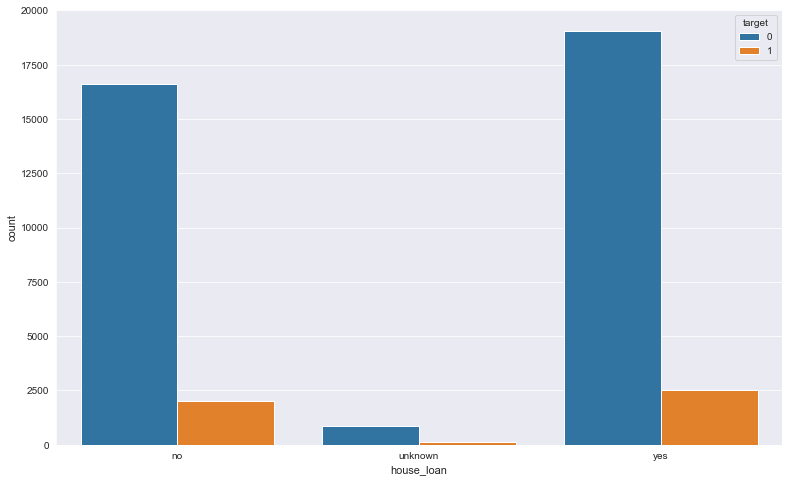

In [382]:
sns.countplot(data = data_viz, x = 'house_loan', hue = 'target');

In [383]:
by_house_loan = compute_proportion(data_viz, 'house_loan')
by_house_loan

house_loan
no         11.0
unknown    11.0
yes        12.0
Name: target, dtype: float64

The subscription rate for all three categories is very similar.

### Personal loans and target

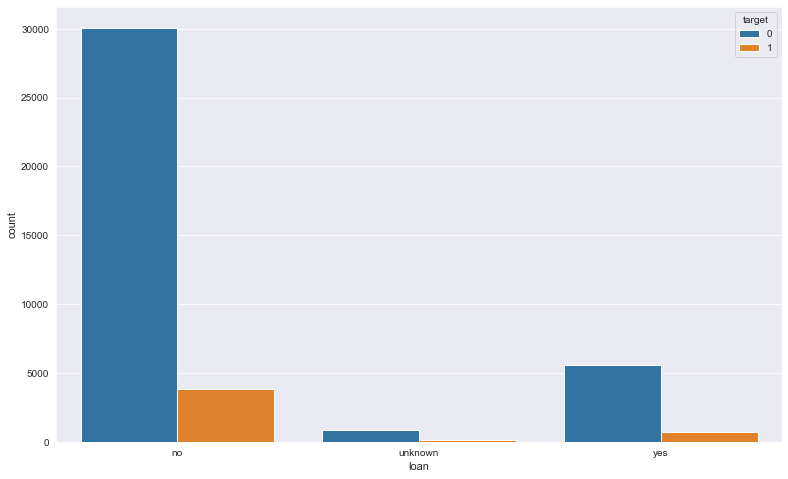

In [384]:
sns.countplot(data = data_viz, x = 'loan', hue = 'target');

In [385]:
by_personal_loan = compute_proportion(data_viz, 'loan')
by_personal_loan

loan
no         11.0
unknown    11.0
yes        11.0
Name: target, dtype: float64

It seems that there is no interesting relationship between the subscription rate and personal loans of the clients. The subscription rate is about the same percentage regardless the possesion of personal loan or missing this information.

### Contact type and target

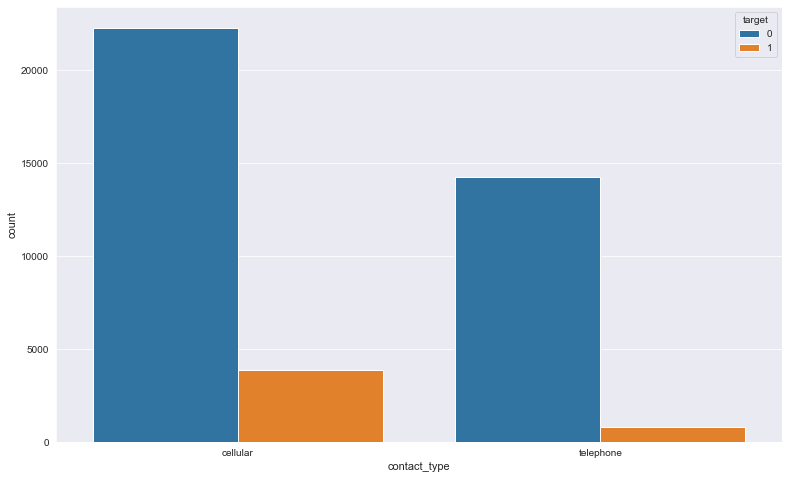

In [386]:
sns.countplot(data = data_viz, x = 'contact_type', hue = 'target');

In [387]:
by_contact_type = compute_proportion(data_viz, 'contact_type')
by_contact_type

contact_type
cellular     15.0
telephone     5.0
Name: target, dtype: float64

There is higher subscription rate if the clients were contacted through cellphone. Only 5% of clients who own telephone have subscribe the term deposit.

### Age intervals vs target variable 

For visualization purposes we´ll use `pandas .qcut()` method that create age intervals based on quantiles that we define.

In [388]:
# Finding the intervals using qcut, setting we want to have 6 bins
# Defining 0 decimal points to use for calculating the bin precision
age_discret = pd.qcut(data_viz.age, q = 6)

In [389]:
# Creating new variable for binned ages
data_viz['age_range'] = age_discret

In [390]:
print('Age intervals: ',data_viz.age_range.values,'\n'*3, 'The amount of observation per bin: ','\n',data_viz.age_range.value_counts())

Age intervals:  [(51.0, 98.0], (51.0, 98.0], (34.0, 38.0], (38.0, 44.0], (51.0, 98.0], ..., (51.0, 98.0], (44.0, 51.0], (51.0, 98.0], (38.0, 44.0], (51.0, 98.0]]
Length: 41172
Categories (6, interval[float64]): [(16.999, 30.0] < (30.0, 34.0] < (34.0, 38.0] < (38.0, 44.0] < (44.0, 51.0] < (51.0, 98.0]] 


 The amount of observation per bin:  
 (16.999, 30.0]    7381
(30.0, 34.0]      7369
(38.0, 44.0]      7075
(44.0, 51.0]      6506
(51.0, 98.0]      6422
(34.0, 38.0]      6419
Name: age_range, dtype: int64


In [391]:
print(data_viz[['age', 'age_range']])

       age     age_range
0       56  (51.0, 98.0]
1       57  (51.0, 98.0]
2       37  (34.0, 38.0]
3       40  (38.0, 44.0]
4       56  (51.0, 98.0]
...    ...           ...
41183   73  (51.0, 98.0]
41184   46  (44.0, 51.0]
41185   56  (51.0, 98.0]
41186   44  (38.0, 44.0]
41187   74  (51.0, 98.0]

[41172 rows x 2 columns]


Here are the categories (bins) which pandas created for us. Each value was placed within one bin. The widths of our bins is different and we can see it for example for age 46 that was placed within the 44-51 interval and age 74 that was placed within the 51-98 interval. 

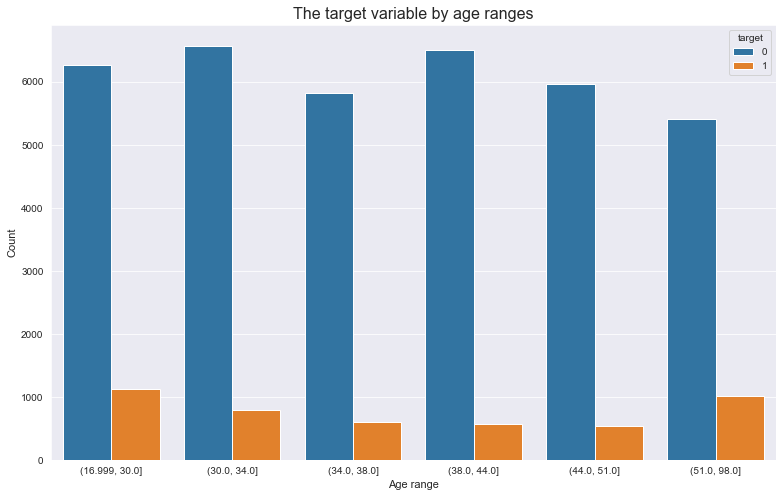

In [392]:
# Age_ranges and target variable visualization
sns.countplot(data = data_viz, x= 'age_range', hue = 'target')
plt.title('The target variable by age ranges')
plt.xlabel('Age range')
plt.ylabel('Count');

The graph above displays bank clients separated into the age ranges along with the target variable. It seems that people in the first group (17-30 years old) are more likely to take the offered term deposit than those who are 30-51 years old. The term deposit is a convenient way for young people to invest available funds and receive a particular return. The last category (51-98) is also interesting since the number of term subscription is similar to the first group.

Now we´ll visualize this age ranges using percentage stacked barchart.

In [393]:
# Grouping age_range and target variable
# Use unstack function to return DataFrame having a new level of column labels for 0 and 1
data_2 = data_viz.groupby(['age_range','target']).age_range.count().unstack()

In [394]:
type(data_2)

pandas.core.frame.DataFrame

In [395]:
data_2

target,0,1
age_range,,
"(16.999, 30.0]",6257,1124
"(30.0, 34.0]",6571,798
"(34.0, 38.0]",5818,601
"(38.0, 44.0]",6508,567
"(44.0, 51.0]",5967,539
"(51.0, 98.0]",5412,1010


Here we can see all of the age ranges and related counts of target variable. To create proportions we need to divide counts for 0 and 1 by total count for each age range.

In [396]:
# Computing the proportions
data_2 = data_2.div(data_2.sum(axis = 1),axis = 0)

In [397]:
data_2

target,0,1
age_range,,
"(16.999, 30.0]",0.847717,0.152283
"(30.0, 34.0]",0.891709,0.108291
"(34.0, 38.0]",0.906372,0.093628
"(38.0, 44.0]",0.919859,0.080141
"(44.0, 51.0]",0.917153,0.082847
"(51.0, 98.0]",0.842728,0.157272


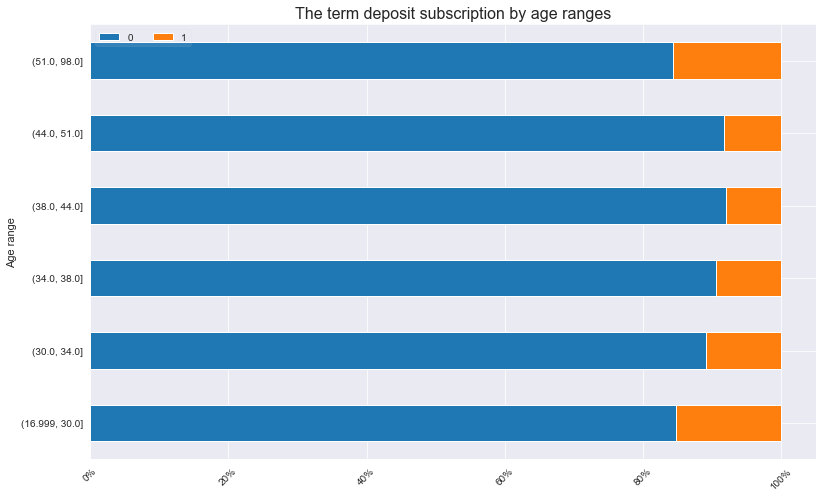

In [398]:
# Percentage stacked barplot
ax = data_2.plot.barh(stacked = True)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in x_values])
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left', ncol = 2, framealpha = 0.1)
plt.title('The term deposit subscription by age ranges')
plt.ylabel('Age range');

Using the percentage stacked bar chart, we can compare our age ranges, observe the differences better, and see the trend among age ranges.

### Duration of calls and target variable 


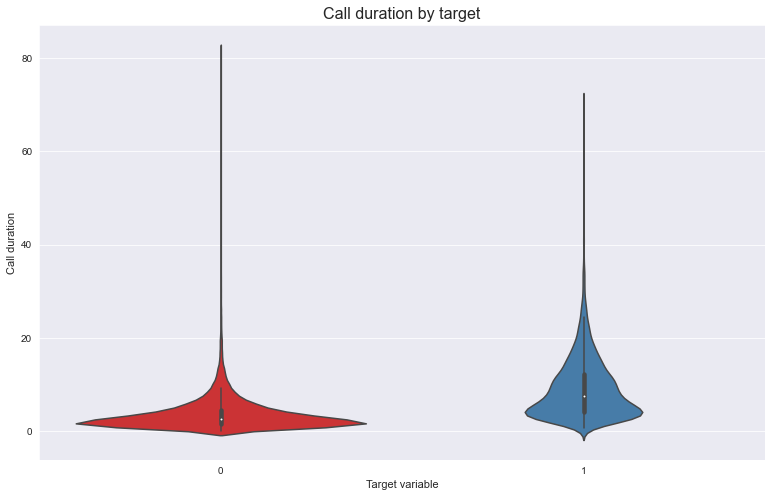

In [399]:
# Call duration vs target variable visualization
sns.violinplot(data = data_viz, x = 'target', y = 'contact_duration', palette = 'Set1')
plt.title('Call duration by target')
plt.xlabel('Target variable')
plt.ylabel('Call duration');

The plot shows the distribution of data points for our target variable, where 0 denote 'No' and 1 is 'Yes' (the client has subscribed to the term deposit or has not). The shape of our violins describes the frequencies of values. In the negative responses, most call duration is slightly above 0, as shown in the thicker part. Most calls with positive responses have been approximately 5-10 minutes long.

In [400]:
data.select_dtypes(include='category')

,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,previous_campaign_outcome
0,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,nonexistent
1,services,married,high.school,unknown,no,no,telephone,May,Monday,nonexistent
2,services,married,high.school,no,yes,no,telephone,May,Monday,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,May,Monday,nonexistent
4,services,married,high.school,no,no,yes,telephone,May,Monday,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,November,Friday,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,November,Friday,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,November,Friday,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,November,Friday,nonexistent


### Call duration and number of calls by target

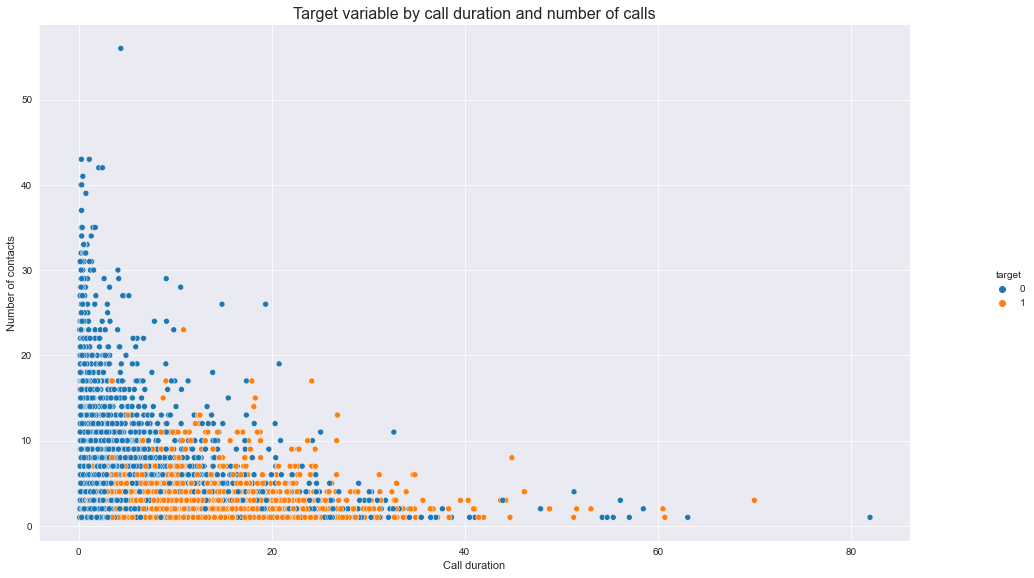

In [401]:
# Call duration vs number of performed contacts vs target variable visualization
g = sns.relplot(data = data_viz, x = 'contact_duration', y = 'number_of_contacts', hue = 'target')
plt.title('Target variable by call duration and number of calls')
plt.xlabel('Call duration')
plt.ylabel('Number of contacts')
# Changing the size for the current figure
plt.gcf().set_size_inches(15, 8)

Description

In [402]:
# Return randomly selected 10% of data
data_sample = data_viz.sample(frac = 0.1, replace = True)

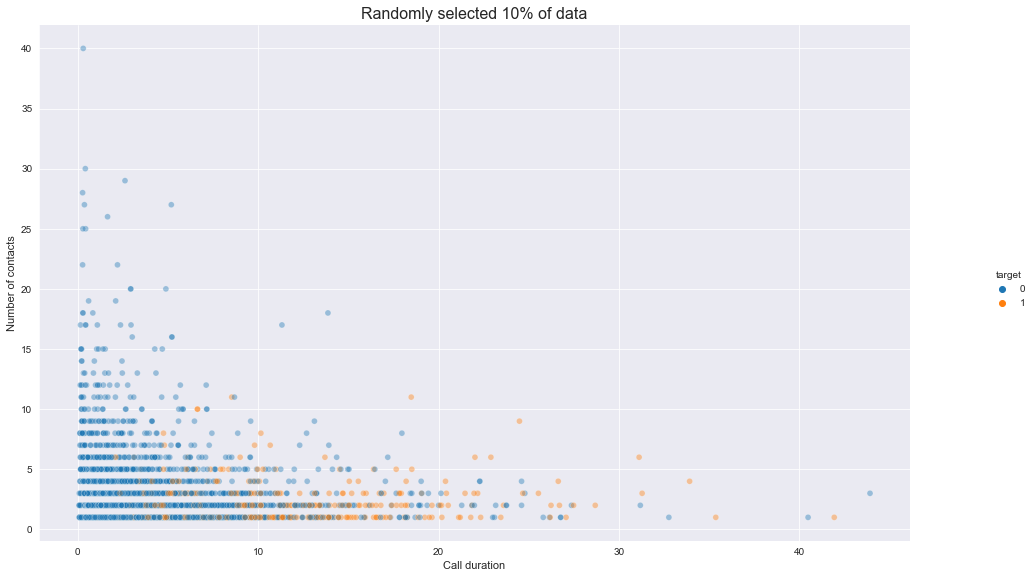

In [403]:
# Visualization sample dataframe
sns.relplot(x = 'contact_duration', y = 'number_of_contacts', hue = 'target', data = data_sample, alpha = 0.4)
plt.title('Randomly selected 10% of data')
plt.xlabel('Call duration')
plt.ylabel('Number of contacts')
# changing size for the current figure
plt.gcf().set_size_inches(15, 8)

Description

In [404]:
## lmplot

## 3. Feature engineering

In this part, I would like to try several feature transformations, which will be a part of composite estimators in the next Modeling part of this notebook.

In [405]:
# Copy of dataset for FE
data_fe = data.drop(['contact_duration','days_passed'], axis = 1)

In [406]:
# Creating independent features x and dependent feature y
X = data_fe.drop('target', axis = 1)
y = data_fe.target

In [407]:
# Splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 3.1 Numerical features

### 3.1.1 Discretization of age feature

If we have numerical features with skewed distribution and outliers, we can handle these issues using discretization. 
 
We´ll use again unsupervised method Equal frequency discretization as we used in visualization part, but this time with ` KBinsDiscretizer` from scikit. 

In [408]:
# Importing KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

By default, `KBinsDiscretizer` uses onehot method to encode the transformed output.  We set 'quantile' strategy to use the quantile values to have equally populated bins. And 'ordinal' method for visualization purposes.

In [409]:
# Initializing KBinsDiscretizer with ordinal encoding and quantile strategy
kb_disc = KBinsDiscretizer(n_bins = 6, encode = 'ordinal', strategy = 'quantile')

In [410]:
# Fitting age feature from X_train
kb_disc.fit(X_train[['age']])

KBinsDiscretizer(encode='ordinal', n_bins=6)

In [411]:
print("Bin intervals:\n", kb_disc.bin_edges_)

Bin intervals:
 [array([17., 30., 34., 38., 44., 51., 98.])]


In [412]:
# Transforming age feature from X_train
train_age_bins = kb_disc.transform(X_train[['age']])

In [413]:
# Let´s look at the encoded bins
train_age_bins = pd.DataFrame(train_age_bins, columns = ['age_disc'])
train_age_bins.head(10)

,age_disc
0,5.0
1,1.0
2,1.0
3,3.0
4,4.0
5,0.0
6,3.0
7,0.0
8,3.0
9,0.0


In [414]:
# Transforming age feature from X_test
test_age_bins = kb_disc.transform(X_test[['age']])
test_age_bins = pd.DataFrame(test_age_bins, columns = ['age_disc'])
test_age_bins.head(10)

,age_disc
0,5.0
1,2.0
2,1.0
3,5.0
4,0.0
5,2.0
6,0.0
7,1.0
8,0.0
9,4.0


In [415]:
# Computing number of observations that fall into bins for age feature in train data
train_obs = train_age_bins.groupby('age_disc').age_disc.count() / len(train_age_bins)

In [416]:
# Computing number of observations that fall into bins for age feature in test data
test_obs = test_age_bins.groupby('age_disc').age_disc.count() / len(test_age_bins)

In [417]:
# Concatenating transformed training and testing set
concat_sets = pd.concat([train_obs, test_obs], axis = 1)

In [418]:
concat_sets

,age_disc,age_disc
age_disc,,
0.0,0.135898,0.141666
1.0,0.180203,0.173642
2.0,0.164487,0.163199
3.0,0.180724,0.183194
4.0,0.164625,0.163361
5.0,0.174062,0.174937


In [419]:
# New labels
concat_sets.columns = ['training data', 'testing data']

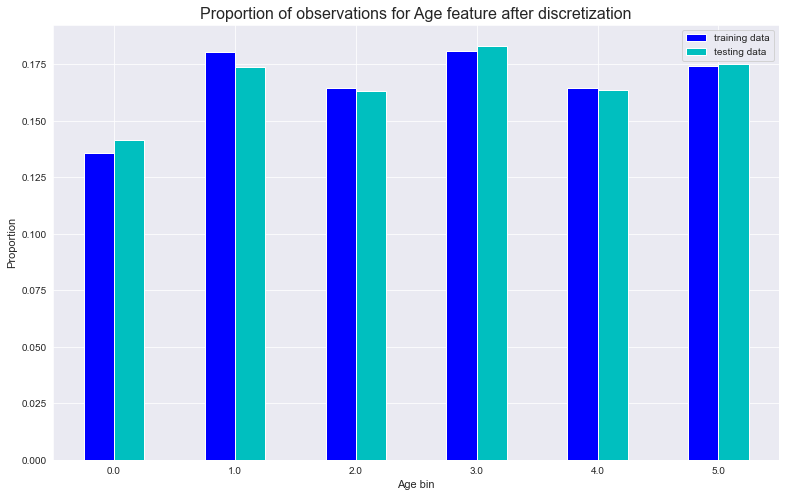

In [420]:
# Visualization of proportions of observations in training and testing sets
colors = 'bc'
concat_sets.plot(kind = 'bar', color = colors)
plt.title('Proportion of observations for Age feature after discretization')
plt.xlabel('Age bin')
plt.ylabel('Proportion')
plt.xticks(rotation = 0);

After discretization, the values are better spread across the different intervals. 

### 3.1.2 Feature scaling

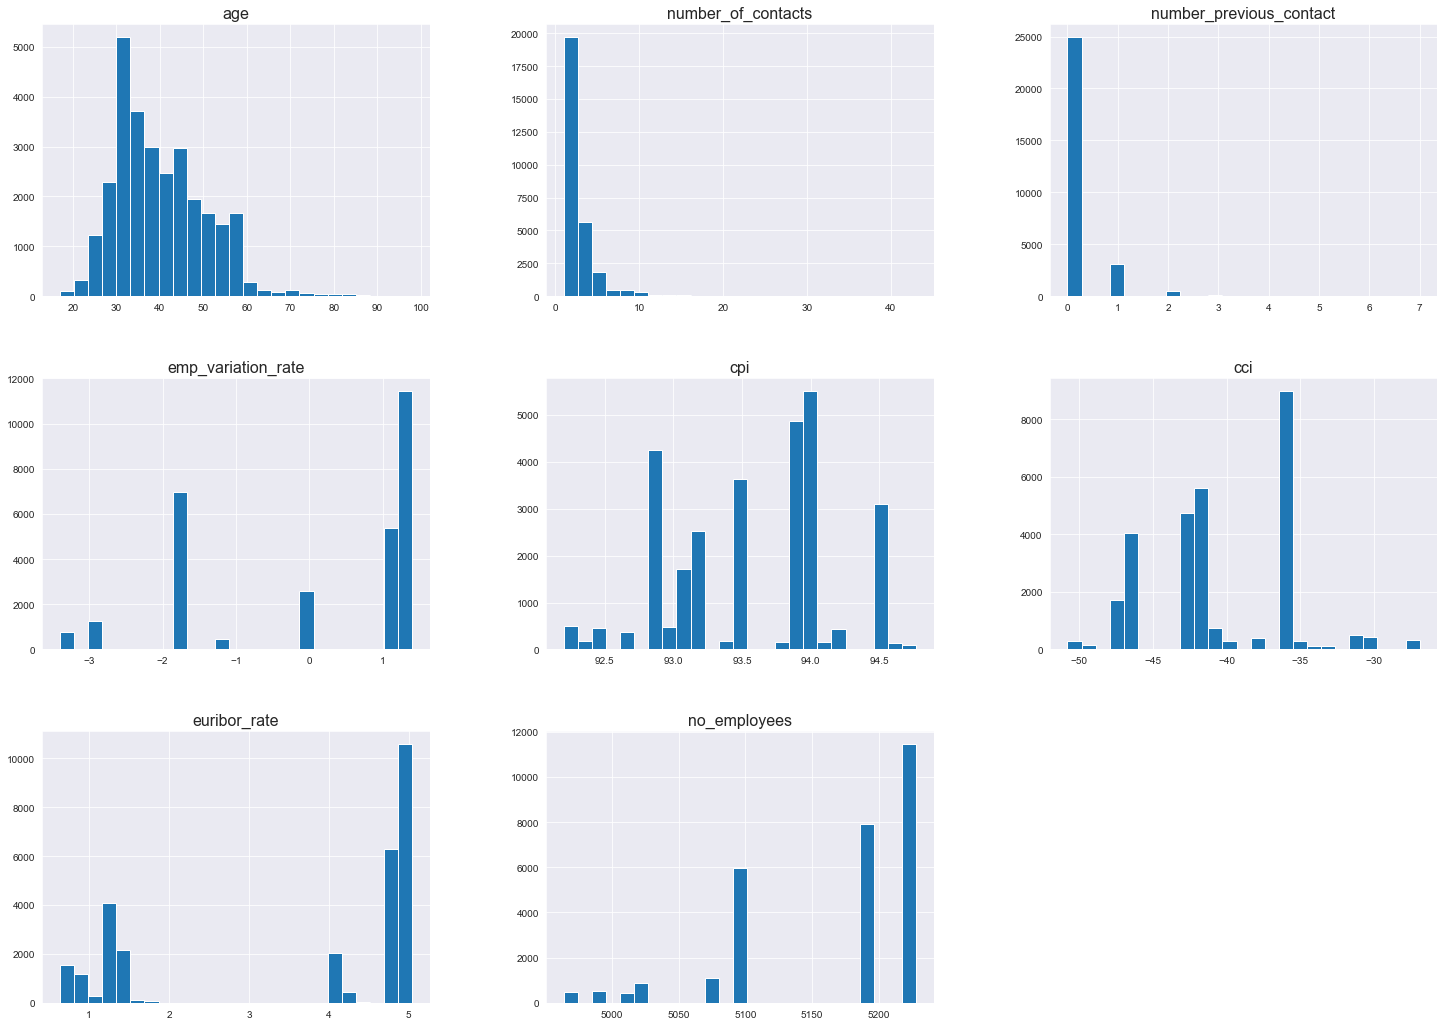

In [421]:
# Feature distribution
X_train.hist(figsize = (25,18), bins = 25);

Considering the ranges of numerical features, we can see that they differ from each other. While variable number_previous_contact ranges from 0 to 7, the magnitude of no_employees is in thousands. For example, if we throw these data to distance-based models, features with the largest range will dominate, and our predictions will be less precise. For the other machine learning models, such as the Decision tree, we do not need to scale features. As we can see, not all of our variables have a normal distribution. Close to the normal distribution is variable age. On the other hands, there are several variables, such as contact duration with the long tail. 

The first option to scale data is using StandardScaler. Since not all of our features follow Gaussian distribution, the MinMaxScaler could give us better results. However, some of our features contain outliers. The MinMaxScaler is sensitive to extreme values, so a better scaling option would be **robust scaler**, which removes median and scales data according to the inter-quantile range. 

        robust_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

In [422]:
# Importing RobustScaler
from sklearn.preprocessing import RobustScaler

In [423]:
# Initializing a scaler
rob_scaler = RobustScaler()

In [424]:
# Fitting numerical features from X_train
rob_scaler.fit(X_train.select_dtypes(include=np.number))

RobustScaler()

In [425]:
print('Median values: ', rob_scaler.center_, '\n'*2, 'IQR values: ', rob_scaler.scale_)

Median values:  [ 3.8000e+01  2.0000e+00  0.0000e+00  1.1000e+00  9.3749e+01 -4.1800e+01
  4.8570e+00  5.1910e+03] 

 IQR values:  [ 15.      2.      1.      3.2     0.919   6.3     3.617 129.   ]


After fitting part median values and IQR values are stored to be used in transformation part.

In [426]:
# Transforming 
r_scaled_train = rob_scaler.transform(X_train.select_dtypes(include=np.number))
r_scaled_test = rob_scaler.transform(X_test.select_dtypes(include=np.number))

In [427]:
# Temporary df to compare median values and visualization
r_scaled_train = pd.DataFrame(r_scaled_train)
r_scaled_train.columns = ['age','number_of_contacts',
                          'number_previous_contact','emp_variation_rate','cpi','cci','euribor_rate','no_employees']

In [428]:
# Comparing median values before scaling and after
print('Original median values: ','\n', X_train.median(),'\n'*3, 'Medin values after scaling: ','\n',r_scaled_train.median())

Original median values:  
 age                          38.000
number_of_contacts            2.000
number_previous_contact       0.000
emp_variation_rate            1.100
cpi                          93.749
cci                         -41.800
euribor_rate                  4.857
no_employees               5191.000
dtype: float64 


 Medin values after scaling:  
 age                        0.0
number_of_contacts         0.0
number_previous_contact    0.0
emp_variation_rate         0.0
cpi                        0.0
cci                        0.0
euribor_rate               0.0
no_employees               0.0
dtype: float64


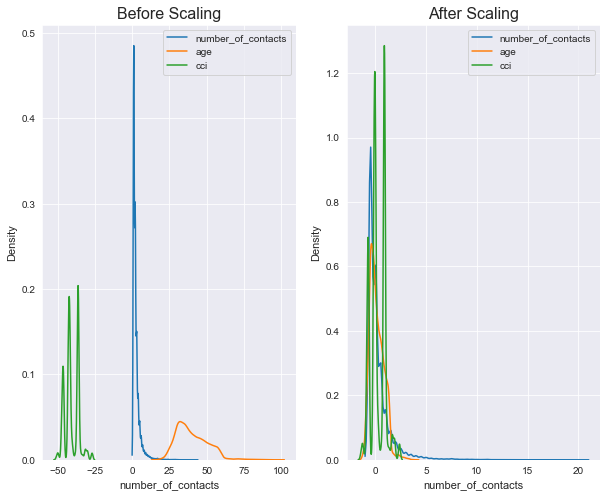

In [429]:
# Viasualization of distribution
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['number_of_contacts'], ax = ax1)
sns.kdeplot(X_train['age'], ax = ax1)
sns.kdeplot(X_train['cci'], ax = ax1)
ax1.legend(labels = ['number_of_contacts', 'age', 'cci'])

ax2.set_title('After Scaling')
sns.kdeplot(r_scaled_train['number_of_contacts'], ax = ax2)
sns.kdeplot(r_scaled_train['age'], ax = ax2)
sns.kdeplot(r_scaled_train['cci'], ax = ax2)
ax2.legend(labels = ['number_of_contacts', 'age', 'cci']);

## 3.2 Categorical features

In [430]:
from sklearn.preprocessing import OneHotEncoder

In [431]:
encoder = OneHotEncoder(drop = 'first', sparse = False, handle_unknown = 'error')

In [432]:
encoder.fit(X_train)

OneHotEncoder(drop='first', sparse=False)

In [433]:
encoder.categories_

[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 91, 92, 94, 95, 98], dtype=int64),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['April'

In [434]:
encoded_train = encoder.transform(X_train)

In [435]:
encoded_train = pd.DataFrame(encoded_train)
encoded_train.columns = encoder.get_feature_names()
encoded_train.head()

,x0_18,x0_19,x0_20,x0_21,x0_22,x0_23,x0_24,x0_25,x0_26,x0_27,...,x17_4991.6,x17_5008.7,x17_5017.5,x17_5023.5,x17_5076.2,x17_5099.1,x17_5176.3,x17_5191.0,x17_5195.8,x17_5228.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3.3 Baseline Feature selection (correlation)

In [436]:
# Computing correlation coefficients
corr = data.corr()
corr

,age,contact_duration,number_of_contacts,days_passed,number_previous_contact,emp_variation_rate,cpi,cci,euribor_rate,no_employees
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
contact_duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
number_of_contacts,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
days_passed,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
number_previous_contact,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_variation_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cpi,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cci,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor_rate,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
no_employees,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


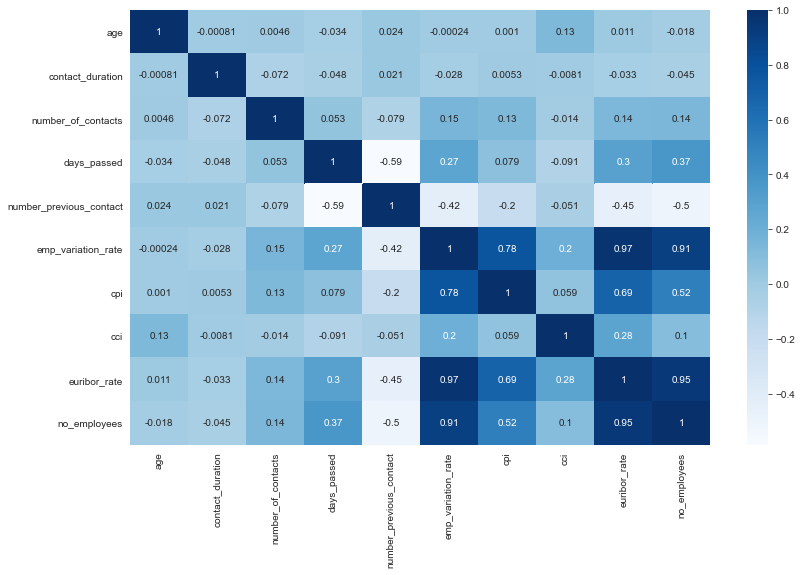

In [437]:
sns.heatmap(corr, annot = True, cmap = 'Blues');

Using correlation heatmap we can see which features are correlated and also their relationship with the target feature. Important note of datasource is that the duration feature highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. The strongest relationship is between euribor_rate and emp_variation_rate (0.97). We´ll preserve euribor_rate feature that have stronger relationship with target feature and drop emp_variation_rate.

In [438]:
data.drop(['contact_duration', 'emp_variation_rate'], axis = 1, inplace = True)

## 3.4 Composite Estimators

In this section, we create the composite estimator to perform feature engineering. As we have numerical and categorical features, their transformations need to be done separately. For this purpose, we use several ColumnTransformers where we can define specific features to be processed and the transformers are applied in parallel. The outputs of ColumnTransformes will be concatenated using FeatureUnion into a composite feature space.

In [439]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

data.target = data.target.apply(lambda x: 1 if x == 'yes' else 0)
X = data.drop('target', axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [440]:
# Selecting numerical and categorical features 
all_numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
all_categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# A set of operations in composite is applied to all numericalal features except age feature
numerical_cols_no_age = [x for x in all_numerical_cols if x != 'age']

In [441]:
# Transforming age feature using KBinsDiscretizer
# Scaling numerical features using MinMaxScaler and selected features based on variance threshold
# Encoding categorical features
baseline_feature_engineering = FeatureUnion([
    ("age_numerical_feature",
     #AGE transformation 
    ColumnTransformer([(
        'age_discret',
        Pipeline(steps=[(
            'kbins_discret',
            KBinsDiscretizer(n_bins=6,encode='onehot', strategy='quantile')
            )]),
        ['age']
    )])
    ),
    ("numerical_features",
     #numerical transformations except age
     ColumnTransformer([(
         'numerical_scale_select',
         Pipeline(steps=[
             ('scaling', MinMaxScaler()),
             ('variance', VarianceThreshold(0.01))
         ]),
         numerical_cols_no_age
    )])
    ),
    ("categorical_features",
    #categorical transformations
    ColumnTransformer([(
        'categorical_ohe',
        Pipeline(steps=[
            ('ohe',OneHotEncoder(drop='first',handle_unknown='error'))
        ]),
        all_categorical_cols
    )])
    ),  
])

In [442]:
baseline_feature_engineering.fit(X_train)

FeatureUnion(transformer_list=[('age_numerical_feature',
                                ColumnTransformer(transformers=[('age_discret',
                                                                 Pipeline(steps=[('kbins_discret',
                                                                                  KBinsDiscretizer(n_bins=6))]),
                                                                 ['age'])])),
                               ('numerical_features',
                                ColumnTransformer(transformers=[('numerical_scale_select',
                                                                 Pipeline(steps=[('scaling',
                                                                                  MinMaxScaler()),
                                                                                 ('variance',
                                                                                  VarianceThreshold(threshold=0.01))]),
                      

In [443]:
# Transforming training data
transformed_train = baseline_feature_engineering.transform(X_train)

In [444]:
# Output array
transformed_train

<28823x11 sparse matrix of type '<class 'numpy.float64'>'
	with 171876 stored elements in Compressed Sparse Row format>

In [445]:
# pandas df for exploration
temporary_df = pd.DataFrame(transformed_train)
temporary_df

,0
0,"(0, 5)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.6987..."
1,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.2696..."
2,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.4844..."
3,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.3893..."
4,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.2696..."
...,...
28818,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.6987..."
28819,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.8823..."
28820,"(0, 5)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.0896..."
28821,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 7)\t0.6987..."


# 4. Baseline modeling

Comparing several model which are using same baseline feature engineering.

## 4.1 Dummy Model

As the first simple baseline model we´ll pick DummyClassifier that makes predictions using simple rules and use it to compare with other classifiers. To generate predictions we set stratified strategy, that generates random predictions by respecting training set class distribution.

In [458]:
# Importing classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [448]:
# Creating Pipeline with feature engineering and predictive model
fe_du_composite = Pipeline(steps =[("features", baseline_feature_engineering),
                                   ("predictive_model", DummyClassifier(strategy = 'stratified', random_state = 42))])

In [449]:
# Pipeline fitting
fe_du_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

In [450]:
# Predictions - training and testing data
du_train_pred = fe_du_composite.predict(X_train)
du_test_pred = fe_du_composite.predict(X_test)

## 4.2 Logistic Regression

Next we´ll use Logistic Regression method that will predict the probability of an instance belonging to the default class.

In [451]:
# Creating Pipeline with feature engineering and predictive model
fe_lr_composite = Pipeline(steps =[("features", baseline_feature_engineering), 
                                   ("predictive_model", LogisticRegression())])

In [452]:
# Pipeline fitting
fe_lr_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

In [453]:
# Predictions - training and testing data
lr_train_pred = fe_lr_composite.predict(X_train)
lr_test_pred = fe_lr_composite.predict(X_test)

## 4.3 Decision Tree

As the next classification model we chose Decision Tree. Here, predicting outcome (in our case Subscriber and Non-subscriber of term deposit) is based on finding and creating the best split of selected independent features based on some condition. Each split is created with the respect to the cost function minimalization. Since Decision tree tend to overfit we´ll use one of the so-called stopping criteria, and so we´ll set the maximum depth of our tree. It means the nodes will be expanding to the particular depth until reach this boundary. 

In [454]:
# Creating Pipeline with feature engineering and predictive model
fe_dt_composite = Pipeline(steps =[("features", baseline_feature_engineering), 
                                     ("predictive_model", DecisionTreeClassifier(max_depth = 3, random_state = 42))])

In [455]:
# Pipeline fitting
fe_dt_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

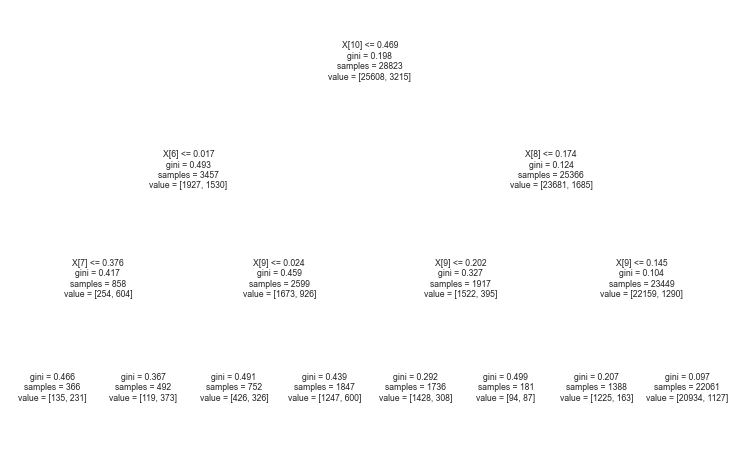

In [459]:
# Plot tree
plot_tree(fe_dt_composite["predictive_model"]);

In [460]:
# Predictions - training and testing data
dt_train_pred = fe_dt_composite.predict(X_train)
dt_test_pred = fe_dt_composite.predict(X_test)

## 4.3 Random Forest



In [461]:
# Creating Pipeline for Ensemble - Random Forest
fe_rf_composite = Pipeline(steps =[("features", baseline_feature_engineering), 
                                   ("predictive_model", RandomForestClassifier(max_depth=3, random_state = 42))])

In [462]:
# Fitting Pipeline
fe_rf_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

In [463]:
# Predictions - training and testing data
rf_train_pred = fe_rf_composite.predict(X_train)
rf_test_pred = fe_rf_composite.predict(X_test)

# 5. Baseline Evaluation

## 5.1 Confusion Matrix

In [464]:
from sklearn.metrics import confusion_matrix

In [465]:
# Function to plot confusion matrix
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot = True, ax = ax, fmt='g', cbar=False, cmap = 'YlGnBu')
    title = ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.xaxis.set_ticklabels(['Non-Buyer', 'Buyer'])
    ax.yaxis.set_ticklabels(['Non-Buyer', 'Buyer'])
    return ax

In [466]:
# Confusion matrix for Dummy model
confusion_matrix(y_test, du_test_pred)

array([[9717, 1212],
       [1278,  146]], dtype=int64)

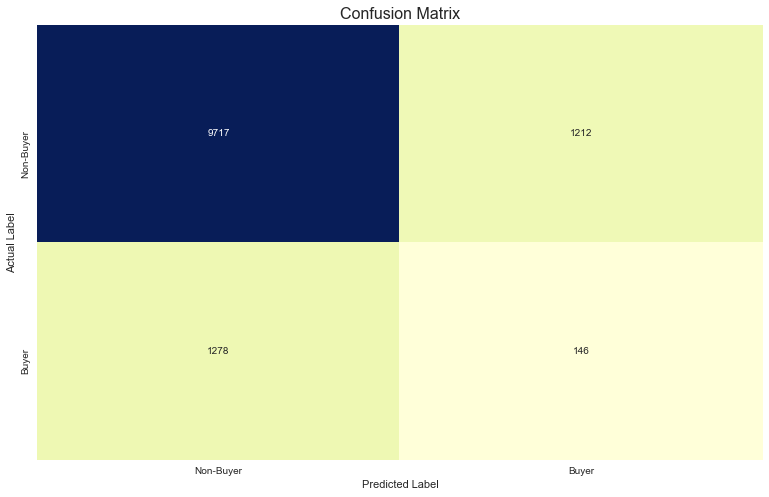

In [467]:
# Plot Confusion matrix for Dummy model
plot_cm(y_test, du_test_pred);

In [468]:
# Confusion matrix for Linear Regression
confusion_matrix(y_test, lr_test_pred)

array([[10823,   106],
       [ 1168,   256]], dtype=int64)

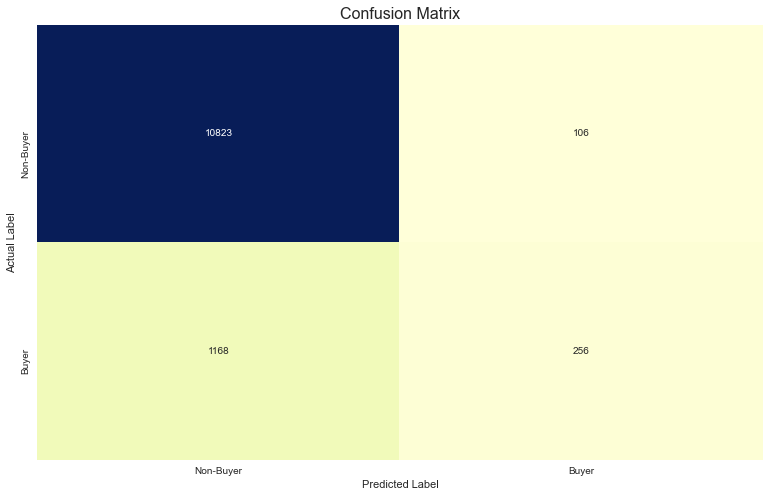

In [469]:
# Plot Confusion matrix for Linear Regression
plot_cm(y_test, lr_test_pred);

In [470]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_test_pred).ravel()
print('\n','True Negatives: ',tn,'\n','False Positives: ',fp,'\n','False Negatives: ',fn,'\n','True Positives: ',tp)


 True Negatives:  10823 
 False Positives:  106 
 False Negatives:  1168 
 True Positives:  256


In [471]:
# Confusion matrix for Decision Tree
confusion_matrix(y_test, dt_test_pred)

array([[10824,   105],
       [ 1169,   255]], dtype=int64)

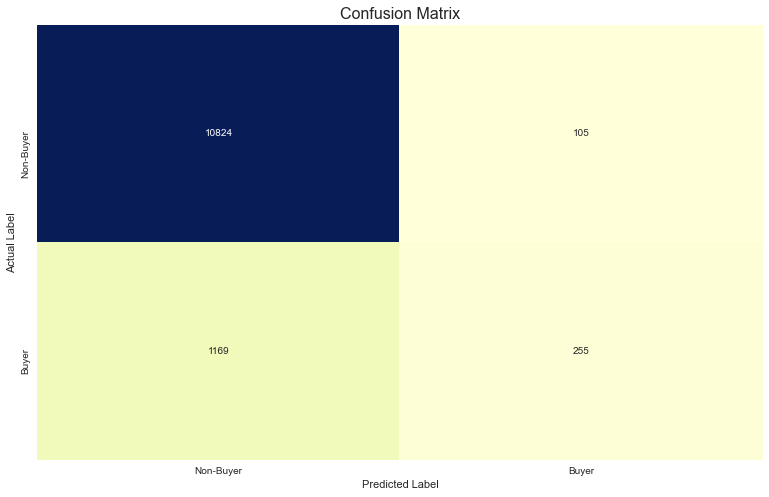

In [472]:
# Plot Confusion matrix for Decision Tree
plot_cm(y_test, dt_test_pred);

In [473]:
# Confusion matrix for Random Forest
confusion_matrix(y_test, rf_test_pred)

array([[10833,    96],
       [ 1187,   237]], dtype=int64)

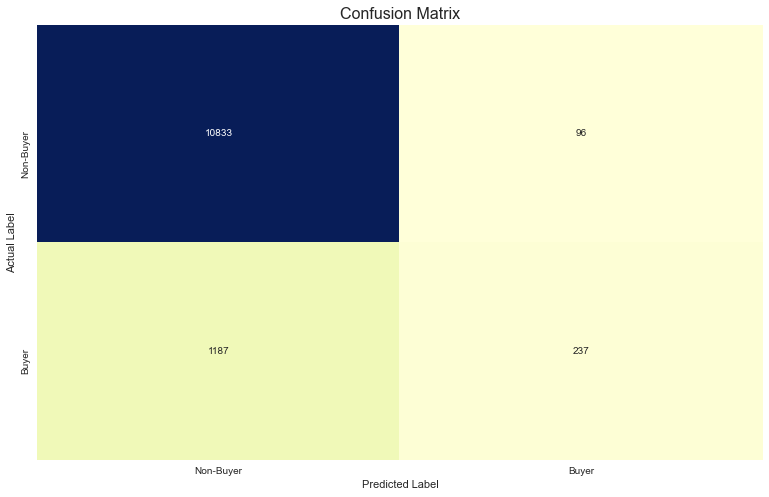

In [474]:
# Plot Confusion matrix for Random Forest
plot_cm(y_test, rf_test_pred);

## 5.2 Precision

As the first metric to evaluating our models we´ll use presicion_score. This metric compute precision of our classifiers, in other words their ability to not label a sample as positive while in the reality is negative. In our case, ability of model to not label a client as he/she will subscribe term deposit, while the true is that he/she will not. 

Precision score is the ratio computed as following:

         precision_score = tp / (tp + fp)

Where tp stands for True Positive and fp for False Positive.

This metric helps us find out the answer to our first question: **Out of the clients to whom we will call, how many of them will subscribe the term deposit?**

In [475]:
from sklearn.metrics import precision_score

#### Dummy model

In [476]:
# Precision score for Dummy model - training data
du_train_precision = precision_score(y_train, du_train_pred)
du_train_precision

0.1163151364764268

In [477]:
# Precision score for Dummy model - testing data
du_test_precision = precision_score(y_test, du_test_pred)
du_test_precision

0.10751104565537556

#### Logistic regression

In [478]:
# Precision score for Linear Regression - training data
lr_train_precision = precision_score(y_train, lr_train_pred)
lr_train_precision

0.6991869918699187

In [479]:
# Precision score for Linear Regression - testing data
lr_test_precision = precision_score(y_test, lr_test_pred)
lr_test_precision

0.7071823204419889

Seeing computed precision for Linear Regression model we would say: Out of the bank clients to whom we will call, approximately 65% of them will subscribe the term deposit.

#### Decision Tree

In [480]:
# Precision score for Decision Tree - training data
dt_train_precision = precision_score(y_train, dt_train_pred)
dt_train_precision

0.703962703962704

In [481]:
# Precision score for Decision Tree - testing data
dt_test_precision = precision_score(y_test, dt_test_pred)
dt_test_precision

0.7083333333333334

#### Random Forest

In [482]:
# Precision score for Random Forest - training data
rf_train_precision = precision_score(y_train, rf_train_pred)
rf_train_precision

0.7142857142857143

In [483]:
# Precision score for Random Forest - testing data
rf_test_precision = precision_score(y_test, rf_test_pred)
rf_test_precision

0.7117117117117117

## 5.3 Recall

In [484]:
from sklearn.metrics import recall_score

#### Dummy model

In [485]:
# Recall score for Dummy model - training data
du_train_recall = recall_score(y_train, du_train_pred)
du_train_recall

0.1166407465007776

In [486]:
# Recall score for Dummy model - testing data
du_test_recall = recall_score(y_test, du_test_pred)
du_test_recall

0.10252808988764045

#### Logistic regression

In [487]:
# Recall score for Logistic Regression - training data
lr_train_recall = recall_score(y_train, lr_train_pred)
lr_train_recall

0.18724727838258165

In [488]:
# Recall score for Logistic Regression - testing data
lr_test_recall = recall_score(y_test, lr_test_pred)
lr_test_recall

0.1797752808988764

#### Decision Tree

In [489]:
# Recall score for Decision Tree - training data
dt_train_recall = recall_score(y_train, dt_train_pred)
dt_train_recall

0.18786936236391913

In [490]:
# Recall score for Decision Tree - testing data
dt_test_recall = recall_score(y_test, dt_test_pred)
dt_test_recall

0.17907303370786518

#### Random Forest

In [491]:
# Recall score for Decision Tree - training data
rf_train_recall = recall_score(y_train, rf_train_pred)
rf_train_recall

0.17729393468118196

In [492]:
# Recall score for Decision Tree - testing data
rf_test_recall = recall_score(y_test, rf_test_pred)
rf_test_recall

0.16643258426966293

## 5.4 Precision - Recall curve

In [493]:
from sklearn.metrics import precision_recall_curve

In [494]:
# Dummy model probabilities
du_probs = fe_du_composite.predict_proba(X_test)
# Keep probabilities only for positive output
du_probs = du_probs[:, 1]

In [495]:
# Dummy model - precision and recall
du_precision, du_recall, _ = precision_recall_curve(y_test, du_probs)

In [496]:
# Logistic Regression probabilities
lr_probs = fe_lr_composite.predict_proba(X_test)
# Keep probabilities only for positive output
lr_probs = lr_probs[:, 1]

In [497]:
# Logostic regression - precision and recall
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

In [498]:
# Decision Tree probabilities
dt_probs = fe_dt_composite.predict_proba(X_test)
# Keep probabilities only for positive output
dt_probs = dt_probs[:, 1]

In [499]:
# Decision Tree precision and recall
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)

In [500]:
# Random Forest - probabilities
rf_probs = fe_rf_composite.predict_proba(X_test)
# Keep probabilities only for positive output
rf_probs = rf_probs[:, 1]

In [501]:
# Random Forest - precision and recall
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

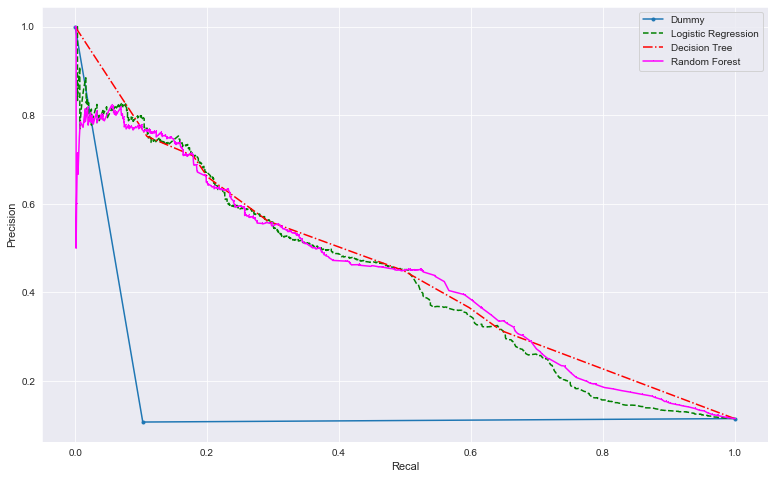

In [502]:
plt.plot(du_recall, du_precision, marker = '.', label = 'Dummy')
plt.plot(lr_recall, lr_precision, linestyle = '--', label = 'Logistic Regression', color = 'green')
plt.plot(dt_recall, dt_precision, linestyle = '-.', label = 'Decision Tree', color = 'red')
plt.plot(rf_recall, rf_precision, marker = ',', label = 'Random Forest', color = 'magenta')
plt.xlabel('Recal')
plt.ylabel('Precision')
plt.legend();

## 5.5 ROC

In [503]:
from sklearn.metrics import plot_roc_curve

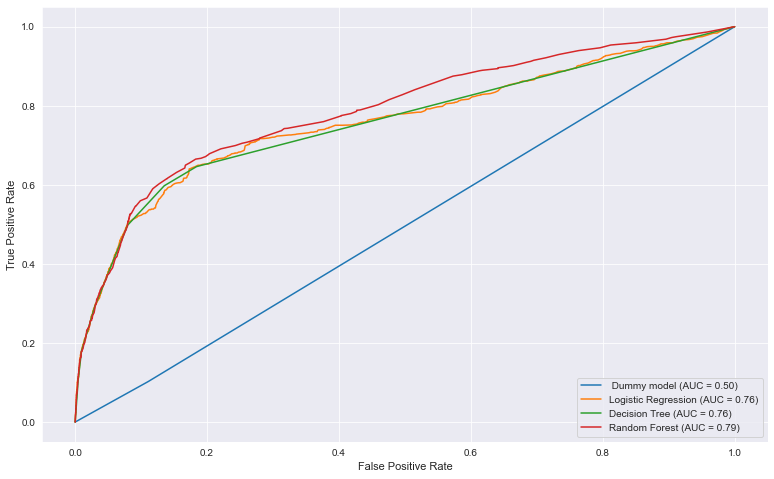

In [504]:
du_plot = plot_roc_curve(fe_du_composite, X_test, y_test, name = ' Dummy model')
lr_plot = plot_roc_curve(fe_lr_composite, X_test, y_test, ax=du_plot.ax_, name = 'Logistic Regression')
dt_plot = plot_roc_curve(fe_dt_composite, X_test, y_test, ax=du_plot.ax_, name = 'Decision Tree')
rf_plot = plot_roc_curve(fe_rf_composite, X_test, y_test, ax=du_plot.ax_, name = 'Random Forest')

# 6. Model tuning

## 6.1 Decision Tree

Chi-square 

chi2 is used to compute chi-squared statistics between non-negative feature and class. Chi-squared score is computed between each categorical feature and the target feature. Based on computed score we can select n features that are highly dependent on the response, which is the aim of feature selection. Many irrelevant features increase training time of the model and can lead to overfitting.

In [505]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [506]:
# Decision Tree composite 
# Selecting 18 top features with the highest chi-squared statistics
fe_fs_dt_composite = Pipeline(steps =[('features', baseline_feature_engineering),
                                      ('chi-square', SelectKBest(chi2, k = 5)),
                                      ('predictive_model', DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20,
                                                                                  min_samples_split = 50))])

In [507]:
fe_fs_dt_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

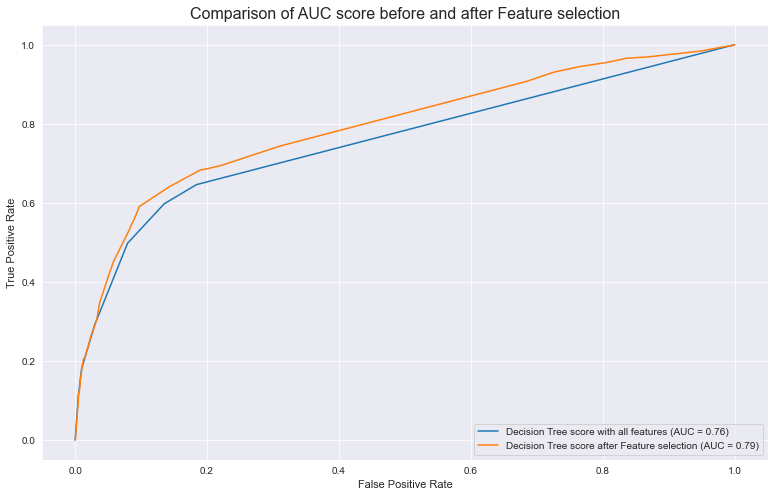

In [508]:
# ROC-AUC curve for Decision Tree after Feature selection
dt_plot = plot_roc_curve(fe_dt_composite, X_test, y_test, name = 'Decision Tree score with all features')
dt_plot_2 = plot_roc_curve(fe_fs_dt_composite, X_test, y_test, ax=dt_plot.ax_, name = 'Decision Tree score after Feature selection')
plt.title('Comparison of AUC score before and after Feature selection');

The computed AUC score, including all of the features, was 0.76. After feature selection, the AUC score increased to a value of 0.79.

In [509]:
fe_fs_dt_composite.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('age_numerical_feature',
                                   ColumnTransformer(transformers=[('age_discret',
                                                                    Pipeline(steps=[('kbins_discret',
                                                                                     KBinsDiscretizer(n_bins=6))]),
                                                                    ['age'])])),
                                  ('numerical_features',
                                   ColumnTransformer(transformers=[('numerical_scale_select',
                                                                    Pipeline(steps=[('scaling',
                                                                                     MinMaxScaler()),
                                                                                    ('variance',
                                                                       

In [510]:
param_grid_dt = {'features__age_numerical_feature__age_discret__kbins_discret__n_bins' : range(4,10, 1),
                 'features__age_numerical_feature__age_discret__kbins_discret__strategy' : ['uniform', 'quantile', 'kmeans'],
                 'features__numerical_features__numerical_scale_select__variance__threshold' : [0.001, 0.1, 0.01],
                 'predictive_model__max_depth': [3,6,9],
                 'predictive_model__min_samples_split': [20, 25, 30, 35, 40],
                 'predictive_model__min_samples_leaf' : [14, 17, 20]}

In [511]:
dt_grid = GridSearchCV(estimator = fe_fs_dt_composite, param_grid = param_grid_dt, scoring = 'roc_auc', verbose = 1)

In [512]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
dt_grid.best_params_

In [513]:
# Changing number of bins and strategy in feature eng pipeline
feature_engineering_dt_tuned = FeatureUnion([
    ("age_numerical_feature",
     #AGE transformation 
    ColumnTransformer([(
        'age_discret',
        Pipeline(steps=[(
            'kbins_discret',
            KBinsDiscretizer(n_bins = 7,encode = 'onehot', strategy = 'uniform')
            )]),
        ['age']
    )])
    ),
    ("numerical_features",
     #numerical transformations except age
     ColumnTransformer([(
         'numerical_scale_select',
         Pipeline(steps=[
             ('scaling', MinMaxScaler()),
             ('variance', VarianceThreshold(0.01))
         ]),
         numerical_cols_no_age
    )])
    ),
    ("categorical_features",
    #categorical transformations
    ColumnTransformer([(
        'categorical_ohe',
        Pipeline(steps=[
            ('ohe',OneHotEncoder(drop='first',handle_unknown='error'))
        ]),
        all_categorical_cols
    )])
    ),  
])

In [514]:
# Fitting baseline feature engineering pipeline
feature_engineering_dt_tuned.fit(X_train)

FeatureUnion(transformer_list=[('age_numerical_feature',
                                ColumnTransformer(transformers=[('age_discret',
                                                                 Pipeline(steps=[('kbins_discret',
                                                                                  KBinsDiscretizer(n_bins=7,
                                                                                                   strategy='uniform'))]),
                                                                 ['age'])])),
                               ('numerical_features',
                                ColumnTransformer(transformers=[('numerical_scale_select',
                                                                 Pipeline(steps=[('scaling',
                                                                                  MinMaxScaler()),
                                                                                 ('variance',
                       

In [515]:
# Updating composite using the best parameters 
fe_fs_dt_composite_tuned = Pipeline(steps =[('features', feature_engineering_dt_tuned),
                                      ('chi-square', SelectKBest(chi2, k = 8)),
                                      ('predictive_model', DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 20,
                                                                                  min_samples_split = 20))])

In [516]:
# Fitting composite
fe_fs_dt_composite_tuned.fit(X_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=7,
                                                                                                                    strategy='uniform'))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                  

Text(0.5, 1.0, 'Comparison of AUC score before and after hyperparameters tuning.')

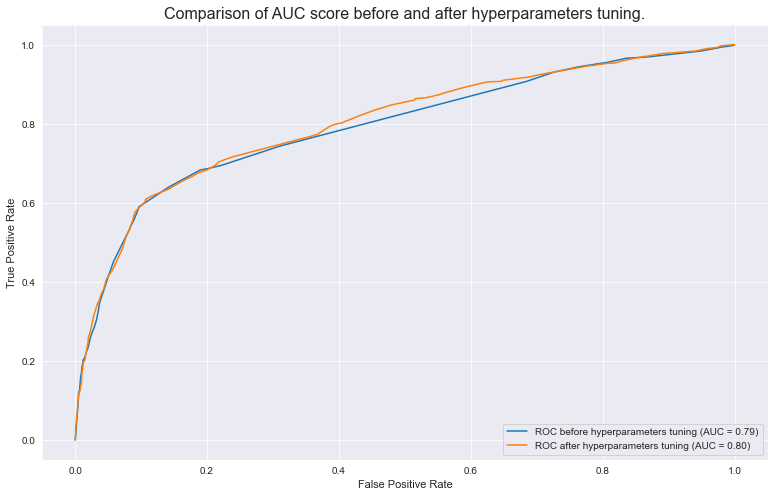

In [517]:
dt_plot = plot_roc_curve(fe_fs_dt_composite, X_test, y_test, name = 'ROC before hyperparameters tuning')
dt_plot_2 = plot_roc_curve(fe_fs_dt_composite_tuned, X_test, y_test, ax = dt_plot.ax_, name = 'ROC after hyperparameters tuning')
plt.title('Comparison of AUC score before and after hyperparameters tuning.')

After hyperparameters tuning the ROC AUC score is 0.80.

## 6.2 Logistic regression


Hyperparameters:

penalty - The norm used in the penalization  
C - Inverse of regularization strength  

This parameter is used as a regularization parameter. With lower values, the regularization strength will be increasing, which creates an underfitted model. High values of this parameter lead to smaller regularization strength, and the model will become overfitted. The default value: 1.0.
max_iter - Maximum number of iterations taken for the solvers to converge. Default: 100


In [518]:
# Feature Selection - SelectKBest
fe_fs_lr_composite = Pipeline(steps =[("features", baseline_feature_engineering),
                                      ('chi-square', SelectKBest(chi2, k = 8)),
                                      ("predictive_model", LogisticRegression())])

In [519]:
fe_fs_lr_composite.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=6))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                                                                                   MinMaxScaler()),
                                                      

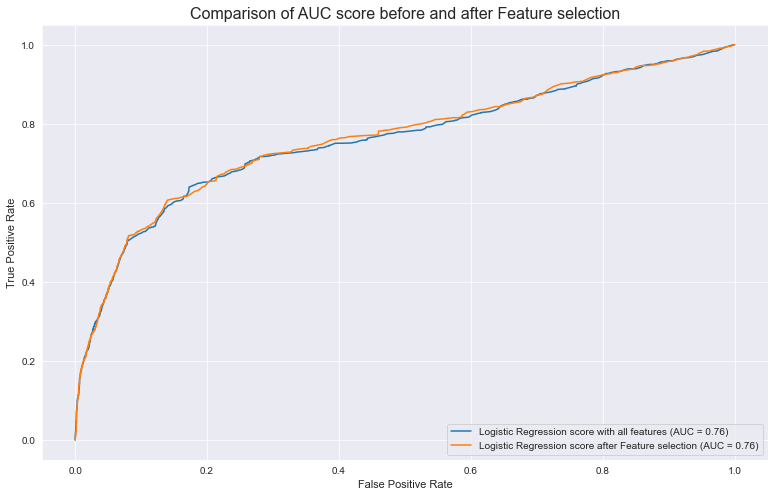

In [520]:
# ROC-AUC curve for Logistic Regression after Feature selection
lr_plot = plot_roc_curve(fe_lr_composite, X_test, y_test, name = 'Logistic Regression score with all features')
lr_plot_2 = plot_roc_curve(fe_fs_lr_composite, X_test, y_test, ax = lr_plot.ax_, name = 'Logistic Regression score after Feature selection')
plt.title('Comparison of AUC score before and after Feature selection');

In [ ]:
fe_fs_lr_composite.get_params()

In [ ]:
# Defining Hypeparameters values
param_grid_log_reg = {'features__age_numerical_feature__age_discret__kbins_discret__n_bins' : range(4,10, 1),
                      'features__age_numerical_feature__age_discret__kbins_discret__strategy' : ['uniform', 'quantile', 'kmeans'],
                      'features__numerical_features__numerical_scale_select__variance__threshold' : [0.001, 0.1, 0.01],
                      'predictive_model__C' : [0.001,0.01,0.1,1,10,100,1000],
                      'predictive_model__max_iter' : [110, 120, 130, 140, 150]}

In [ ]:
# Searching over specified parameters with default 5-fold cross validation
lr_grid = GridSearchCV(estimator = fe_fs_lr_composite, param_grid = param_grid_log_reg, scoring = 'roc_auc', verbose = 1)

In [ ]:
lr_grid.fit(X_train, y_train)

In [ ]:
print(lr_grid.best_params_)

In [521]:
feature_engineering_lr_tuned = FeatureUnion([
    ("age_numerical_feature",
     #AGE transformation 
    ColumnTransformer([(
        'age_discret',
        Pipeline(steps=[(
            'kbins_discret',
            KBinsDiscretizer(n_bins=4,encode='onehot', strategy='kmeans')
            )]),
        ['age']
    )])
    ),
    ("numerical_features",
     #numerical transformations except age
     ColumnTransformer([(
         'numerical_scale_select',
         Pipeline(steps=[
             ('scaling', MinMaxScaler()),
             ('variance', VarianceThreshold(0.001))
         ]),
         numerical_cols_no_age
    )])
    ),
    ("categorical_features",
    #categorical transformations
    ColumnTransformer([(
        'categorical_ohe',
        Pipeline(steps=[
            ('ohe',OneHotEncoder(drop='first',handle_unknown='error'))
        ]),
        all_categorical_cols
    )])
    ),  
])

In [522]:
# Update hyperparameters
fe_fs_lr_composite_tuned = Pipeline(steps =[("features", feature_engineering_lr_tuned),
                                            ('chi-square', SelectKBest(chi2, k = 8)),
                                            ("predictive_model", LogisticRegression(C = 10, max_iter = 110))])

In [523]:
fe_fs_lr_composite_tuned.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('age_numerical_feature',
                                                 ColumnTransformer(transformers=[('age_discret',
                                                                                  Pipeline(steps=[('kbins_discret',
                                                                                                   KBinsDiscretizer(n_bins=4,
                                                                                                                    strategy='kmeans'))]),
                                                                                  ['age'])])),
                                                ('numerical_features',
                                                 ColumnTransformer(transformers=[('numerical_scale_select',
                                                                                  Pipeline(steps=[('scaling',
                                   

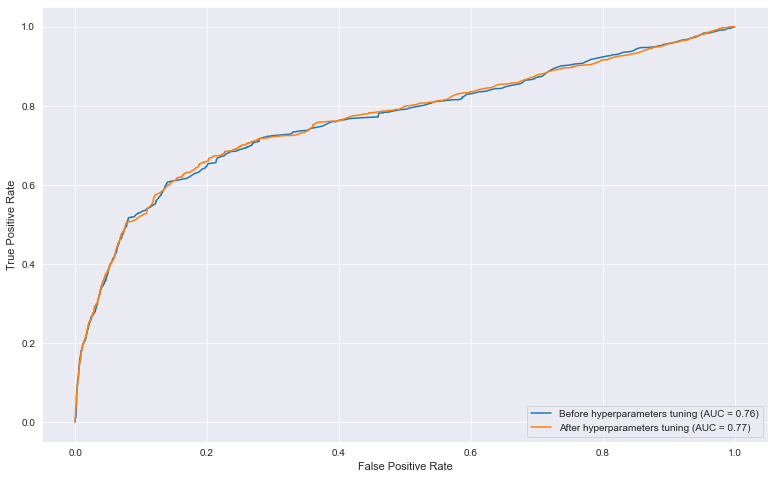

In [524]:
log_reg_plot = plot_roc_curve(fe_fs_lr_composite, X_test, y_test, name = 'Before hyperparameters tuning')
log_reg_plot_2 = plot_roc_curve(fe_fs_lr_composite_tuned, X_test, y_test, ax = log_reg_plot.ax_, name = 'After hyperparameters tuning')

## Balancing the data
### over-sampling minority class

In [529]:
# Separating target variable according to classes
data_majority_class = data[data['target'] == 0]
data_minority_class = data[data['target'] == 1]

In [533]:
# Majority class
data_majority_class.target.value_counts()

0    36537
Name: target, dtype: int64

In [536]:
# Upsampling the minority class using the number of observations in majority class with replacing
from sklearn.utils import resample
data_ups_minority = resample(data_minority_class, n_samples = 36537, replace = True, random_state = 42)

In [539]:
# Creating new upsamled dataset
data_up = pd.concat([data_majority_class, data_ups_minority])

In [540]:
# The dataset has now the same amount of observations in both classes
data_up.target.value_counts()

1    36537
0    36537
Name: target, dtype: int64

In [544]:
# Splitting upsampled dataset into training and testing data
X = data_up.drop(['days_passed', 'target'], axis = 1)
y = data_up['target']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Sources

https://stackoverflow.com/questions/31357611/format-y-axis-as-percent

https://pbpython.com/pandas_dtypes_cat.html

https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm

https://pbpython.com/pandas-qcut-cut.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2